<a href="https://colab.research.google.com/github/ouldsidy/Projets/blob/main/ProjetML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dans ce projet, nous allons construire un modèle prédictif à partir d'un esemble de données réalistes. Les données étudiées sont stockées dans plusieurs fichers. Ils concernent 100 000 français. L'objectif est de construire un modèle prédictif pour la variable "target", qui ici répresente une caractéristique non diviluée liée au statut socio-économique de la personne pris au sens large.

On va d'abord récupérer les données, les decouvrir et les visualiser pour mieux les comprendre.

- Préparer les données pour l'algorithme d'apprentissage automatique

- Sélectionner un modèle et l'entraîner.






### Pckages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)



1.  **Objéctif**
1.  **Analyses des données**
2.   



# Partie I

## Récupérer les données

## Analyse exploratoire

Je vais d'abord travailler uniquement sur les données de base (c'est-à-dire la description générale des personnes), et par la suite je completerais cet ensemble de données par des informations contenus dans d'autres dossiers, que nous possédons (métiers, sports,....etc).


### Examiner La structure des donneés 

Examinons les cinq premières ligne de l'ensemble de données sur la déscription générale des personnes à l'aide de la méthode head() du DataFrame.

In [2]:
#Importation des données 
df_pers = pd.read_csv("/content/drive/MyDrive/projet MLfiles/learn_dataset.csv")
df_pers.head()



,UID,ACTIVITY_TYPE,AGE_2018,sex,OCCUPATION_42,Is_student,degree,household_type,Insee,target
0,1,type1-1,44,Male,csp_4_5,False,DIP|1|3,ft4-1,01004,33.179
1,3,type2-1,52,Male,csp_7_7,False,DIP|1|1,ft4-3,01004,42.306
2,5,type2-1,80,Male,csp_7_4,False,DIP|1|7,ft4-4,01004,45.922
3,7,type1-1,58,Male,csp_2_2,False,DIP|1|6,ft1-1,01004,39.303
4,11,type1-1,42,Male,csp_6_7,False,DIP|1|3,ft1-1,01004,28.623


In [ ]:
df_pers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UID             50000 non-null  int64  
 1   ACTIVITY_TYPE   50000 non-null  object 
 2   AGE_2018        50000 non-null  int64  
 3   sex             50000 non-null  object 
 4   OCCUPATION_42   50000 non-null  object 
 5   Is_student      50000 non-null  bool   
 6   degree          50000 non-null  object 
 7   household_type  50000 non-null  object 
 8   Insee           50000 non-null  object 
 9   target          50000 non-null  float64
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 3.5+ MB


Il y'a 50 000 ligne dans ce tableau de base, sans valeurs manquantes, seuls les variables AGE_2018 et traget sont numériques.

Je vais mainteneant afficher la liste des modalitès de chaque variable qualitative.

In [4]:
df_01=df_pers.copy()

In [18]:
df_01.drop(columns=["UID"],axis=1,inplace=True)

### liste des modalitès de chaque variable qualitative.

In [ ]:
df_pers["ACTIVITY_TYPE"].value_counts()

type1-1    24360
type2-1    13475
type2-2     4765
type1-2     3786
type2-5     2154
type2-4     1460
Name: ACTIVITY_TYPE, dtype: int64

In [ ]:
df_pers["sex"].value_counts()

Female    26150
Male      23850
Name: sex, dtype: int64

In [ ]:
df_pers["OCCUPATION_42"].value_counts()

csp_7_7    4363
csp_8_4    4340
csp_7_8    3289
csp_8_5    3266
csp_7_5    2679
csp_4_6    2406
csp_5_2    2380
csp_5_6    1916
csp_5_4    1694
csp_6_3    1460
csp_4_3    1436
csp_5_5    1352
csp_3_8    1283
csp_3_7    1282
csp_6_7    1250
csp_4_7    1209
csp_7_4    1200
csp_7_2    1118
csp_6_2     983
csp_8_6     957
csp_4_2     926
csp_2_1     836
csp_6_8     825
csp_3_4     805
csp_2_2     730
csp_6_4     680
csp_7_1     642
csp_5_3     592
csp_4_8     553
csp_3_1     544
csp_3_3     515
csp_4_5     459
csp_6_5     443
csp_8_1     430
csp_3_5     334
csp_1_1     269
csp_6_9     262
csp_2_3     167
csp_1_3      84
csp_4_4      22
csp_1_2      19
Name: OCCUPATION_42, dtype: int64

In [ ]:
df_pers["Is_student"].value_counts()

False    43893
True      6107
Name: Is_student, dtype: int64

In [ ]:
df_pers["household_type"].value_counts()

ft4-1    16715
ft4-4     9600
ft1-2     5658
ft4-2     4627
ft1-1     4277
ft3-2     4081
ft4-3     2919
ft2-0     1253
ft3-1      870
Name: household_type, dtype: int64

Examinons maintenant les champs des variables quantitaves.

In [ ]:
df_01.describe()

,AGE_2018,target
count,50000.000,50000.000
mean,48.895,40.919
std,20.301,6.825
min,15.000,7.495
25%,32.000,36.722
50%,48.000,41.432
75%,64.000,45.471
max,121.000,71.381


### Examiner La structure des donneés

In [8]:
def check_df(dataframe, head=5):
    print("##########################################  SHAPE ##########################################")
    print(dataframe.shape)
    print("##########################################  Types ##########################################")
    print(dataframe.dtypes)
   # print("######################################### # Head ##########################################")
    #print(dataframe.head(head))
    #print("########################################## Tail ##########################################")
    #print(dataframe.tail(head))
    print("######################################### NA ##########################################")
    print(dataframe.isnull().sum())
    print("##########################################  NUMBERUNIQE ########################################## ")
    print(dataframe.nunique())
    print("########################################## Quantiles ########################################## ")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    

In [ ]:
df_01.describe([x*0.1 for x in range(10)]).T

,count,mean,std,min,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
AGE_2018,50000.000,48.895,20.301,15.000,15.000,21.000,29.000,35.000,42.000,48.000,55.000,61.000,68.000,77.000,121.000
target,50000.000,40.919,6.825,7.495,7.495,32.095,35.438,37.810,39.730,41.432,43.053,44.639,46.349,48.723,71.381


In [10]:
df_01['Is_student'] = df_01['Is_student'].astype(str)

In [11]:
check_df(df_01)

##########################################  SHAPE ##########################################
(50000, 10)
##########################################  Types ##########################################
UID                 int64
ACTIVITY_TYPE      object
AGE_2018            int64
sex                object
OCCUPATION_42      object
Is_student         object
degree             object
household_type     object
Insee              object
target            float64
dtype: object
######################################### NA ##########################################
UID               0
ACTIVITY_TYPE     0
AGE_2018          0
sex               0
OCCUPATION_42     0
Is_student        0
degree            0
household_type    0
Insee             0
target            0
dtype: int64
##########################################  NUMBERUNIQE ########################################## 
UID               50000
ACTIVITY_TYPE         6
AGE_2018             94
sex                   2
OCCUPATION_42        41
Is_stud

On a dans cet ensemble de données 50 000 lignes et 10 variables, sans valeurs manquantes, seuls les variables AGE_2018 et traget sont numériques. 


On va diviser cet ensemble de données en colonnes numériques, et d'autres part catégorielles.


In [12]:
def grab_col_names(dataframe, cat_th=7, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [19]:
cat_cols, num_cols, cat_but_car = grab_col_names(df_01)

Observations: 50000
Variables: 9
cat_cols: 5
num_cols: 2
cat_but_car: 2
num_but_cat: 0


On va par exemple afficher les colonnes de type catégoriques, mais avec plus de 20 modalités différenets.

In [ ]:
df_01[cat_but_car].head()

,OCCUPATION_42,Insee
0,csp_4_5,01004
1,csp_7_7,01004
2,csp_7_4,01004
3,csp_2_2,01004
4,csp_6_7,01004


In [ ]:
df_01[cat_cols].head()

,ACTIVITY_TYPE,degree,household_type,sex,Is_student
0,type1-1,DIP|1|3,ft4-1,1,0
1,type2-1,DIP|1|1,ft4-3,1,0
2,type2-1,DIP|1|7,ft4-4,1,0
3,type1-1,DIP|1|6,ft1-1,1,0
4,type1-1,DIP|1|3,ft1-1,1,0


In [ ]:
df_01[num_cols].head()

,AGE_2018,target
0,44,33.179
1,52,42.306
2,80,45.922
3,58,39.303
4,42,28.623


### Distribution de variables catégorielles

Dans cette partie, on va visualiser les variables categorielles ayant moins de 7 modalités et le ratio de chacune.

In [35]:
def cat_summary(dataframe, col_name, plot=True):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

         ACTIVITY_TYPE   Ratio
type1-1          24360  48.720
type2-1          13475  26.950
type2-2           4765   9.530
type1-2           3786   7.572
type2-5           2154   4.308
type2-4           1460   2.920
##########################################


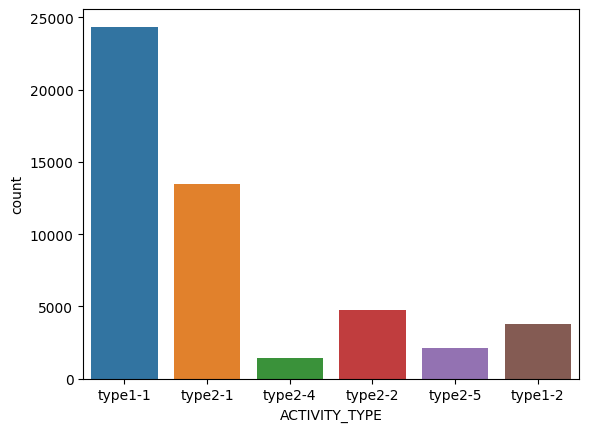

          sex  Ratio
Female  26150   52.3
Male    23850   47.7
##########################################


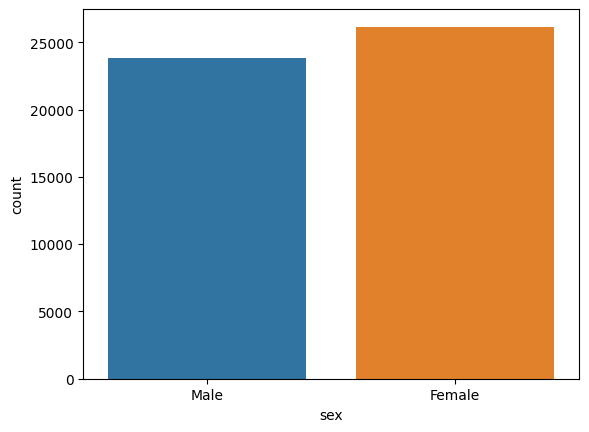

       Is_student   Ratio
False       43893  87.786
True         6107  12.214
##########################################


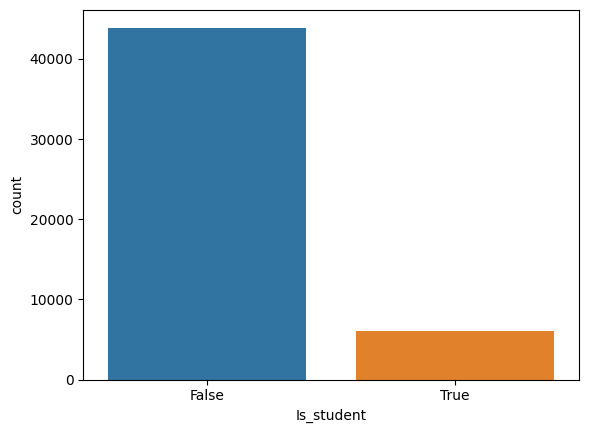

         degree   Ratio
DIP|1|3   11263  22.526
DIP|1|4    5431  10.862
DIP|1|6    5153  10.306
DIP|1|8    4493   8.986
DIP|1|7    4393   8.786
DIP|1|2    4320   8.640
DIP|1|5    3616   7.232
DIP|1|1    3515   7.030
DIP|3      3507   7.014
DIP|2      2708   5.416
DIP|1      1177   2.354
DIP|1|9     424   0.848
##########################################


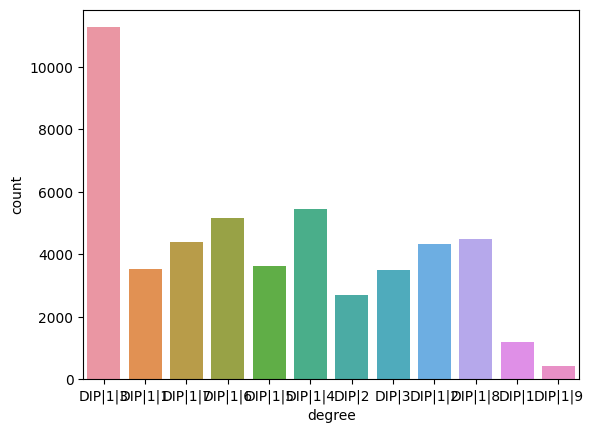

       household_type   Ratio
ft4-1           16715  33.430
ft4-4            9600  19.200
ft1-2            5658  11.316
ft4-2            4627   9.254
ft1-1            4277   8.554
ft3-2            4081   8.162
ft4-3            2919   5.838
ft2-0            1253   2.506
ft3-1             870   1.740
##########################################


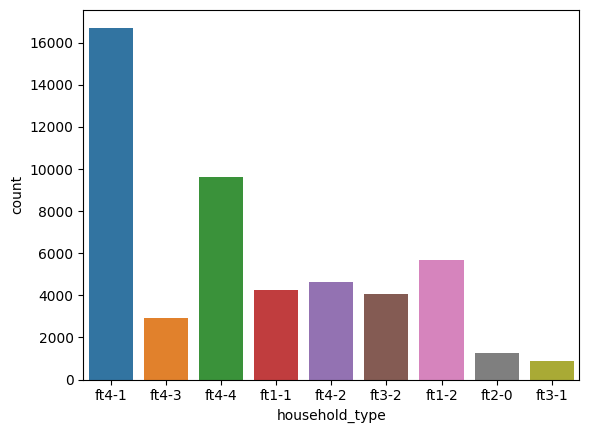

In [ ]:
for col in cat_cols:
    cat_summary(df_01,col)


On remarque par exemple qu'environ 48 % de personnes sont des actifs ayant un emploi, 27 % sont des retraités ou préretraités.

22 % n'ont aucun diplôme, 10 % ont un Baccalauréat général ou technologique, brevet supérieur, capacité en droit, DAEU, ESEU, envioron 8% ont un master ou un diplôme d'ingénieur et moins de 1 % ont un doctorat de recherche.

19 % de ses personnes sont composées de familles principale composées d'un couple de deux 'actifs ayant un emploi' et 11% sont des femmes vivant seules et environ 8% sont des hommes vivant seuls.


Environ 88 % de ces personnes ne sont pas étudiants.



### Distribution de target moyen

Dans cette partie, je vais afficher la valeur moyenne de target pour chaque catégorie. 

In [22]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

In [23]:
for col in cat_cols:
    target_summary_with_cat(df_01,"target",col)

               TARGET_MEAN
ACTIVITY_TYPE             
type1-1             38.985
type1-2             37.419
type2-1             44.136
type2-2             41.344
type2-4             50.012
type2-5             41.714


        TARGET_MEAN
sex                
Female       42.951
Male         38.692


            TARGET_MEAN
Is_student             
False            41.099
True             39.626


         TARGET_MEAN
degree              
DIP|1         42.824
DIP|1|1       44.247
DIP|1|2       38.829
DIP|1|3       41.065
DIP|1|4       41.764
DIP|1|5       40.813
DIP|1|6       39.043
DIP|1|7       42.522
DIP|1|8       38.354
DIP|1|9       38.344
DIP|2         42.618
DIP|3         40.889


                TARGET_MEAN
household_type             
ft1-1                39.146
ft1-2                42.318
ft2-0                38.970
ft3-1                41.994
ft3-2                38.855
ft4-1                41.207
ft4-2                39.092
ft4-3                38.508
ft4-4                43.03

### Distribution des variables numériques

In [36]:
def num_summary(dataframe, numerical_col, plot=False):
   # quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    quantiles = [ 0.25,0.50, 0.75]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count   50000.000
mean       48.895
std        20.301
min        15.000
25%        32.000
50%        48.000
75%        64.000
max       121.000
Name: AGE_2018, dtype: float64


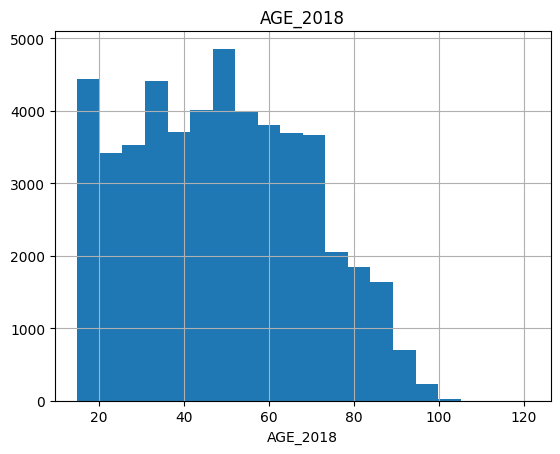

count   50000.000
mean       40.919
std         6.825
min         7.495
25%        36.722
50%        41.432
75%        45.471
max        71.381
Name: target, dtype: float64


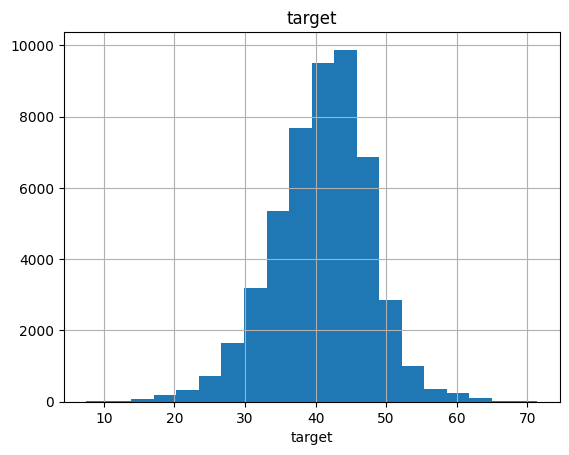

In [ ]:
for col in num_cols:
    num_summary(df_01,col,plot=True)

On peut remarquer que la variable cible semble être normalement distribuée.

### Corrélation entre variables numériques

In [ ]:
def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(15, 15)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    fig = sns.heatmap(df[cols].corr(), annot=False, linewidths=0.3, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)



In [ ]:
correlation_matrix(df_01, df_01.columns)

In [ ]:
df_01[num_cols].corr()

,AGE_2018,target
AGE_2018,1.000,0.275
target,0.275,1.000


## Préparer les données pour les algorithmes d'apprentissage automatique

## Traitement de données manquantes

In [48]:
def quick_missing_imp(data, num_method="median", cat_length=20, target="target"):
    variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]  # Les variables avec des valeurs manquantes sont listées
    temp_target = data[target]

    print("# BEFORE")
    print(data[variables_with_na].isnull().sum(), "\n\n")  # Nombre de valeurs manquantes des variables avant implémentation

    # Remplir les valeurs manquantes avec le mode si l'objet variable et le nombre de classes sont inférieurs ou égaux à cat_length
    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)

    # Si num_method est la moyenne, les valeurs manquantes des variables de type non objet sont remplies avec la moyenne
    if num_method == "mean":
        data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
    # Si num_method est médian, les valeurs manquantes des variables de type non objet sont remplies avec la médiane
    elif num_method == "median":
        data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)

    data[target] = temp_target

    print("# AFTER \n Imputation method is 'MODE' for categorical variables!")
    print(" Imputation method is '" + num_method.upper() + "' for numeric variables! \n")
    print(data[variables_with_na].isnull().sum(), "\n\n")

    return data


### Traitement de données abérentes

In [24]:
def outlier_thresholds(dataframe, variable, low_quantile=0.10, up_quantile=0.90):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [25]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
    
for col in num_cols:
    if col != "target":
      print(col, check_outlier(df_01, col))

AGE_2018 False


### Encodage

On va convertir les variables de type objet en valeurs enières de type binaire.

In [ ]:
def rare_encoder(dataframe, rare_perc):
    temp_df = df_01.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

In [ ]:
rare_encoder(df_01,0.01)
df_01.head()

,ACTIVITY_TYPE,AGE_2018,sex,OCCUPATION_42,Is_student,degree,household_type,Insee,target
0,type1-1,44,Male,csp_4_5,False,DIP|1|3,ft4-1,01004,33.179
1,type2-1,52,Male,csp_7_7,False,DIP|1|1,ft4-3,01004,42.306
2,type2-1,80,Male,csp_7_4,False,DIP|1|7,ft4-4,01004,45.922
3,type1-1,58,Male,csp_2_2,False,DIP|1|6,ft1-1,01004,39.303
4,type1-1,42,Male,csp_6_7,False,DIP|1|3,ft1-1,01004,28.623


In [26]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe



In [ ]:
binary_cols = [col for col in df_01.columns if df_01[col].dtypes == "O" and len(df_01[col].unique()) == 2]

for col in binary_cols:
    label_encoder(df_01, col)

In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe



In [ ]:
df_01 = one_hot_encoder(df_01, cat_cols, drop_first=True)

## Sélectionner et entraîner un modèle

In [ ]:
train_df_01 = df_01[df_01['target'].notnull()]

In [ ]:
train_df_01.head()

,AGE_2018,OCCUPATION_42,Insee,target,ACTIVITY_TYPE_type1-2,ACTIVITY_TYPE_type2-1,ACTIVITY_TYPE_type2-2,ACTIVITY_TYPE_type2-4,ACTIVITY_TYPE_type2-5,sex_1,Is_student_1,degree_DIP|1|1,degree_DIP|1|2,degree_DIP|1|3,degree_DIP|1|4,degree_DIP|1|5,degree_DIP|1|6,degree_DIP|1|7,degree_DIP|1|8,degree_DIP|1|9,degree_DIP|2,degree_DIP|3,household_type_ft1-2,household_type_ft2-0,household_type_ft3-1,household_type_ft3-2,household_type_ft4-1,household_type_ft4-2,household_type_ft4-3,household_type_ft4-4
0,44,csp_4_5,01004,33.179,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,52,csp_7_7,01004,42.306,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,80,csp_7_4,01004,45.922,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,58,csp_2_2,01004,39.303,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,42,csp_6_7,01004,28.623,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_df_01 = df_01[df_01['target'].isnull()]

In [ ]:
test_df_01.head()

,AGE_2018,OCCUPATION_42,Insee,target,ACTIVITY_TYPE_type1-2,ACTIVITY_TYPE_type2-1,ACTIVITY_TYPE_type2-2,ACTIVITY_TYPE_type2-4,ACTIVITY_TYPE_type2-5,sex_1,Is_student_1,degree_DIP|1|1,degree_DIP|1|2,degree_DIP|1|3,degree_DIP|1|4,degree_DIP|1|5,degree_DIP|1|6,degree_DIP|1|7,degree_DIP|1|8,degree_DIP|1|9,degree_DIP|2,degree_DIP|3,household_type_ft1-2,household_type_ft2-0,household_type_ft3-1,household_type_ft3-2,household_type_ft4-1,household_type_ft4-2,household_type_ft4-3,household_type_ft4-4


### ML pour df_01

In [ ]:
y = train_df_01['target'] # np.log1p(df['SalePrice'])
X = train_df_01.drop([ 'OCCUPATION_42', "target", 'Insee'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Réalisons tout d'abord l'entrainement sur un modèle de régression linéaire.

### Régression Linéaire_1

In [ ]:
model_1_regression = LinearRegression()
model_1_regression.fit(X_train, y_train)
y_prediction = model_1_regression.predict(X_test)
print(f"r2_score / training data: {round(model_1_regression.score(X_train, y_train)*100, 1)} %")
print(f"r2_score / test data: {round(model_1_regression.score(X_test, y_test)*100, 1)} %")


r2_score / training data: 36.7 %
r2_score / test data: 35.8 %


Le score est mauvais. 

Voyons maintenant avec un algorithme de type « DecisionTreeRegressor ».

### Arbres de décision_1

In [ ]:
model_1_tree_reg = DecisionTreeRegressor()
model_1_tree_reg.fit(X_train, y_train)
y_prediction = model_1_tree_reg.predict(X_test)
print(f"r2_score / training data: {round(model_1_tree_reg.score(X_train, y_train)*100, 1)} %")
print(f"r2_score / test data: {round(model_1_tree_reg.score(X_test, y_test)*100, 1)} %")


r2_score / training data: 56.7 %
r2_score / test data: 19.1 %


### Random forest_1

In [ ]:
model_1_rforest = RandomForestRegressor()
model_1_rforest.fit(X_train, y_train)
print(f"r2_score / training data: {round(model_1_rforest.score(X_train, y_train)*100, 1)} %")
print(f"r2_score / test data: {round(model_1_rforest.score(X_test, y_test)*100, 1)} %")

r2_score / training data: 55.1 %
r2_score / test data: 28.5 %


Conclusion : Pour cette premiere partie d'étude notre score est plutôt mauvis pour les différents modèls, on remarque aussi un sur-ajustement des modèls: arbres de décision et le random forest.

On va additioner a notre ensemble de base d'autres données sur les emplois actueles des personnes ayant un statut de salarié.

### brouillon 2

In [ ]:
models = [('LR', LinearRegression()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor()),
          #("CatBoost", CatBoostRegressor(verbose=False))
]

for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

In [ ]:
#La fonction de précision
def accu(y_true, y_pred, retu= False):
  acc= accuracy_score(y_true,y_pred)
  if retu :
    return acc
  else :
    print(f'la précision du modele est : {acc}') 

In [ ]:
#medel.fit(X_train, y_train)
accu(x_test, model.predict(X_test))
print('-'*30)

In [ ]:
def train_test_eval(models, X_train,y_train,X_test, y_test):
  for name, model in modeles.items():
    print(name,':')
    medel.fit(X_train, y_train)
    accu(x_test, model.predict(X_test))
    print('-'*30)

train_test_eval(models, X_train,y_train, X_test,y_test)

### Bourillon

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [ ]:
object_cols_df_pers = df_pers.dtypes[df_pers.dtypes == object] 
object_cols_df_pers = object_cols_df_pers.index.tolist()  

#df_pers[object_cols].shape

In [ ]:
df_pers[object_cols_df_pers].shape

(50000, 6)

In [ ]:
df_pers[object_cols_df_pers].head()

,ACTIVITY_TYPE,sex,OCCUPATION_42,degree,household_type,Insee
0,type1-1,Male,csp_4_5,DIP|1|3,ft4-1,01004
1,type2-1,Male,csp_7_7,DIP|1|1,ft4-3,01004
2,type2-1,Male,csp_7_4,DIP|1|7,ft4-4,01004
3,type1-1,Male,csp_2_2,DIP|1|6,ft1-1,01004
4,type1-1,Male,csp_6_7,DIP|1|3,ft1-1,01004


In [ ]:
data_obj = df_pers[object_cols_df_pers]
data_obj['target'] = df_pers['target']

<ipython-input-11-31fc443f95d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_obj['target'] = df_pers['target']


In [ ]:
data_obj.columns

Index(['ACTIVITY_TYPE', 'sex', 'OCCUPATION_42', 'degree', 'household_type',
       'Insee', 'target'],
      dtype='object')

In [ ]:
plt.figure(figsize = [20,80])

for i in range(len(data_obj.columns)):
    plt.subplot(15, 3, i + 1)
    sns.boxplot(data = data_obj, x = data_obj.iloc[:,i], y = 'target')
    plt.grid()

Explication :

L'analyse ANOVA permet d'effectuer une estimation de l'hypothèse zéro affirmant qu'il n'y a pas de lien entre 2 variables. Lorsque la p-value est supérieure à 0,01, cela signifie que nous avons plus de 1 % de probabilité que l'hypothèse zéro soit appropriée pour ces 2 variables.


In [ ]:
formula = 'target ~ C(ACTIVITY_TYPE)'
model = ols(formula, data_obj).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(ACTIVITY_TYPE),5.0,3.999052e+05,79981.030225,2072.759356,0.0
Residual,49994.0,1.929106e+06,38.586742,NaN,NaN


La p-value est petite (inférieure à 0,01) donc nous retenons cette variable.


In [ ]:
formula = 'target ~ C(sex)'
model = ols(formula, data_obj).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(sex),1.0,2.262084e+05,226208.419916,5378.52206,0.0
Residual,49998.0,2.102802e+06,42.057728,NaN,NaN


La p-value est petite (inférieure à 0,01) donc nous retenons cette variable.


In [ ]:
formula = 'target ~ C(OCCUPATION_42)'
model = ols(formula, data_obj).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(OCCUPATION_42),40.0,7.816378e+05,19540.945296,630.905503,0.0
Residual,49959.0,1.547373e+06,30.972856,NaN,NaN


In [ ]:
formula = 'target ~ C(degree)'
model = ols(formula, data_obj).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(degree),11.0,1.358479e+05,12349.808429,281.484902,0.0
Residual,49988.0,2.193163e+06,43.873786,NaN,NaN


In [ ]:
formula = 'target ~ C(household_type)'
model = ols(formula, data_obj).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(household_type),8.0,1.243171e+05,15539.636552,352.358241,0.0
Residual,49991.0,2.204694e+06,44.101811,NaN,NaN


In [ ]:
#Suppression de colonnes inutiles
df_pers_train = df_pers.drop(columns = ['UID', 'Insee', ])
df_pers_train.shape

(50000, 8)

In [ ]:
formula = 'target ~ C(Is_student)'
model = ols(formula, df_pers).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Is_student),1.0,1.164352e+04,11643.521854,251.213017,1.939390e-56
Residual,49998.0,2.317367e+06,46.349198,NaN,NaN


In [ ]:
df_pers_train.info()

Nous pouvons effectuer un encodage pour les variables catogorielles et comparer les ensembles de données.


In [ ]:
df_pers_train_dum = pd.get_dummies(df_pers_train)

In [ ]:
#Entrainement du modèle
model.fit(X,y)

LinearRegression()

In [ ]:
#Réalisation d'une préduction
some_data=X[:5]
print("Prédictions:",model.predict(some_data))

Prédictions: [35.12061135 40.56731077 44.77567122 44.41953046 33.43305106]


In [ ]:
y_pred=model.predict(X)
model_mse=mean_squared_error(y,y_pred)
model_rmse=np.sqrt(model_mse)
model_rmse

4.640073630247634

# Partie II

On va d'abord examiner les données dans l'ensemble JOB, qui contient les emplois actuels des personnes ayant un statut de salarié, puis on ajoutera ses informations aux perssones concernées dans les données initiales.

In [27]:

df_job= pd.read_csv("/content/drive/MyDrive/projet MLfiles/learn_dataset_job.csv")
df_job.head()

,UID,JOB_CATEGORY,JOB_DEP,Working_hours,eco_sect,Terms_of_emp,Employer_type,Emolument,JOB_CONDITION,employee_count,Work_description
0,1,O,71,1838.000,HZ,CDI,ct_9,20794,C,tr_5,451a
1,11,O,01,378.000,NZ,TTP,ct_9,14514,C,tr_1,674a
2,40,O,69,1958.000,QA,CDI,ct_9,21847,C,tr_6,526a
3,48,O,69,1818.000,CH,CDI,ct_9,22790,P,tr_2,542a
4,52,O,38,1843.000,CB,CDI,ct_9,27498,C,tr_6,627a


On reprend les fonctions crées dans la premiere partie pour analyser ces nouvelles données.

In [29]:
df_02=df_job.copy()

In [30]:
df_02.drop(columns=["UID"],axis=1,inplace=True)

In [31]:
check_df(df_02)

##########################################  SHAPE ##########################################
(19612, 10)
##########################################  Types ##########################################
JOB_CATEGORY         object
JOB_DEP              object
Working_hours       float64
eco_sect             object
Terms_of_emp         object
Employer_type        object
Emolument             int64
JOB_CONDITION        object
employee_count       object
Work_description     object
dtype: object
######################################### NA ##########################################
JOB_CATEGORY         0
JOB_DEP              0
Working_hours       65
eco_sect             0
Terms_of_emp         0
Employer_type        0
Emolument            0
JOB_CONDITION        0
employee_count       0
Work_description     0
dtype: int64
##########################################  NUMBERUNIQE ########################################## 
JOB_CATEGORY            3
JOB_DEP                96
Working_hours        2363

Ici, on a un ensemble de 19612 lignes et 11 variables, seule la variable "Working_hours" presente de valeurs manquantes.


In [32]:
cat_cols, num_cols, cat_but_car = grab_col_names(df_02)

Observations: 19612
Variables: 10
cat_cols: 5
num_cols: 2
cat_but_car: 3
num_but_cat: 0


In [ ]:
df_02[cat_but_car].head()

,JOB_DEP,eco_sect,Work_description
0,71,HZ,451a
1,01,NZ,674a
2,69,QA,526a
3,69,CH,542a
4,38,CB,627a


In [ ]:
df_02[num_cols].head()

,Working_hours,Emolument
0,1838.000,20794
1,378.000,14514
2,1958.000,21847
3,1818.000,22790
4,1843.000,27498


   JOB_CATEGORY  Ratio
O         18923 96.487
X           395  2.014
A           294  1.499
##########################################


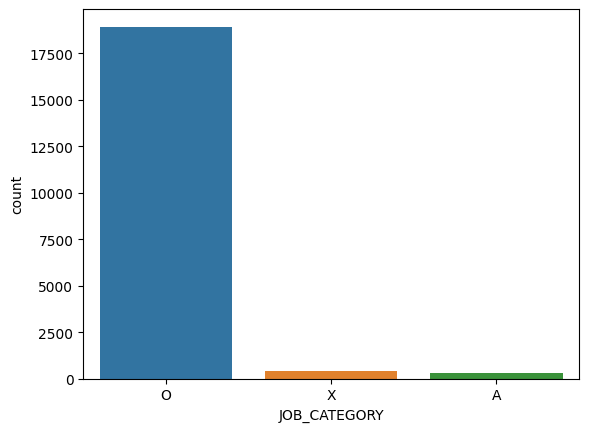

     Terms_of_emp  Ratio
CDI         16901 86.177
AUT          1176  5.996
CDD           727  3.707
TTP           323  1.647
APP           288  1.468
TOA           197  1.004
##########################################


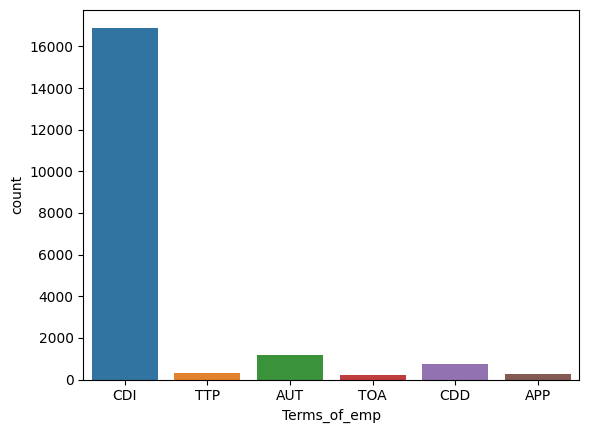

      Employer_type  Ratio
ct_9          12942 65.990
ct_8           3076 15.684
ct_6           1243  6.338
ct_7            553  2.820
ct_2            514  2.621
ct_1            489  2.493
ct_3            441  2.249
ct_5            245  1.249
ct_4            109  0.556
##########################################


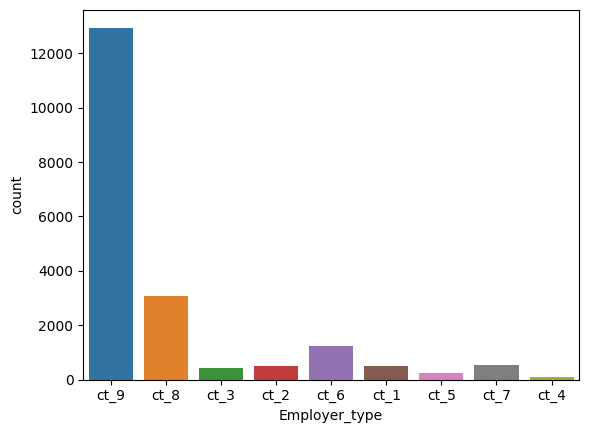

   JOB_CONDITION  Ratio
C          15349 78.263
P           3677 18.749
D            219  1.117
F            199  1.015
K             99  0.505
Y             69  0.352
##########################################


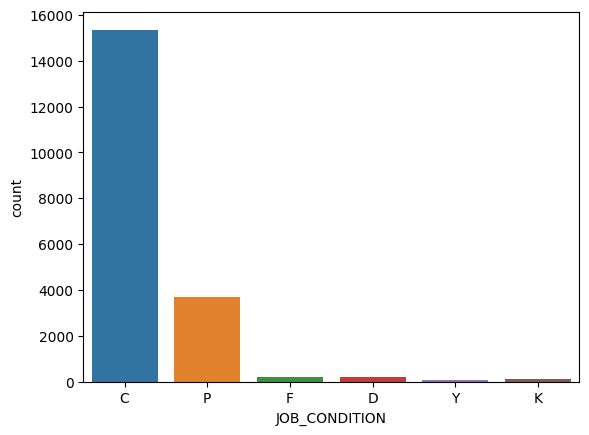

      employee_count  Ratio
tr_1            4449 22.685
tr_6            4361 22.236
tr_3            3188 16.255
tr_5            2632 13.420
tr_4            2486 12.676
tr_2            2181 11.121
tr_0             315  1.606
##########################################


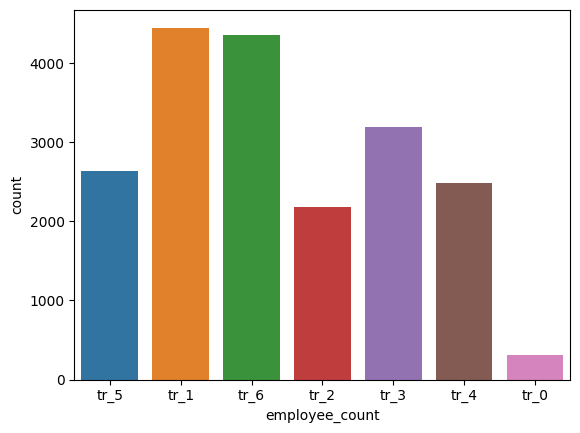

count   19547.000
mean     1601.929
std       533.880
min         1.000
25%      1404.000
50%      1819.000
75%      1855.000
max      3000.000
Name: Working_hours, dtype: float64


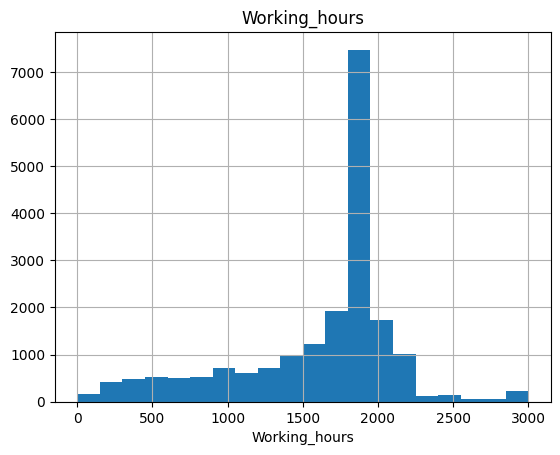

count    19612.000
mean     22812.982
std      13358.865
min         14.000
25%      14562.750
50%      20186.000
75%      28118.750
max     148739.000
Name: Emolument, dtype: float64


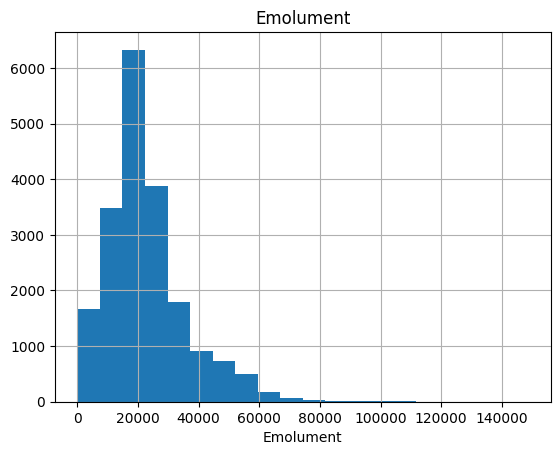

In [37]:
for col in cat_cols:
    cat_summary(df_02,col)
for col in num_cols:
    num_summary(df_02,col,plot=True)


### df_Insee

In [ ]:
df_loc_géog=pd.read_csv("/content/drive/MyDrive/projet MLfiles/city_loc.csv")
df_loc_géog.head()

,X,Y,Insee,lat,long
0,848637.261,6563324.789,01001,46.153,4.926
1,887850.413,6548382.507,01002,46.009,5.428
2,883750.723,6542887.141,01004,45.961,5.373
3,847992.215,6545841.729,01005,45.996,4.912
4,901659.775,6519968.668,01006,45.749,5.594


In [ ]:
df_city_adm= pd.read_csv("/content/drive/MyDrive/projet MLfiles/city_adm.csv")
df_city_adm.head()

,Nom de la commune,Insee,town_type,DEP
0,L' Abergement-Clémenciat,01001,Commune simple,01
1,L' Abergement-de-Varey,01002,Commune simple,01
2,Ambérieu-en-Bugey,01004,Chef-lieu canton,01
3,Ambérieux-en-Dombes,01005,Commune simple,01
4,Ambléon,01006,Commune simple,01


In [ ]:
df_pop= pd.read_csv("/content/drive/MyDrive/projet MLfiles/city_pop.csv")
df_pop

,Insee,INHABITANTS
0,01001,785
1,01002,241
2,01004,14557
3,01005,1658
4,01006,115


In [ ]:
df_insee=pd.merge(df_ins, df_loc_géog, on='Insee')
df_insee.head()

,Insee,INHABITANTS,Nom de la commune,town_type,DEP,X,Y,lat,long
0,01001,785,L' Abergement-Clémenciat,Commune simple,01,848637.261,6563324.789,46.153,4.926
1,01002,241,L' Abergement-de-Varey,Commune simple,01,887850.413,6548382.507,46.009,5.428
2,01004,14557,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723,6542887.141,45.961,5.373
3,01005,1658,Ambérieux-en-Dombes,Commune simple,01,847992.215,6545841.729,45.996,4.912
4,01006,115,Ambléon,Commune simple,01,901659.775,6519968.668,45.749,5.594


<Axes: xlabel='long', ylabel='lat'>

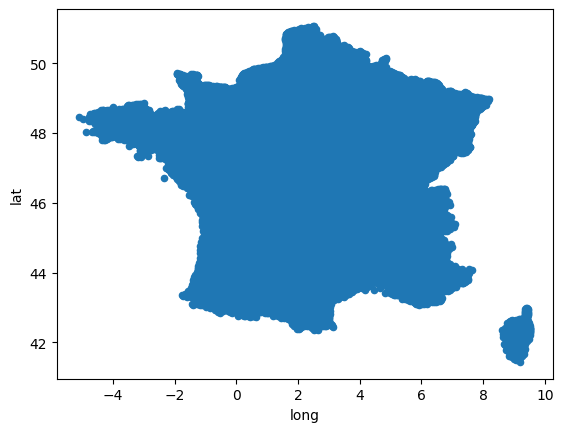

In [ ]:
df_insee.plot(kind="scatter", x ="long", y="lat")

In [ ]:
df_insee["town_type"].value_counts()

Commune simple          32566
Chef-lieu canton         2860
Sous-préfecture           231
Préfecture                 74
Préfecture de région       44
Capitale d'état            20
Name: town_type, dtype: int64

In [ ]:
check_df(df_insee)

##########################################  SHAPE ##########################################
(35795, 9)
##########################################  Types ##########################################
Insee                 object
INHABITANTS            int64
Nom de la commune     object
town_type             object
DEP                   object
X                    float64
Y                    float64
lat                  float64
long                 float64
dtype: object
######################################### # Head ##########################################
   Insee  INHABITANTS         Nom de la commune         town_type DEP  \
0  01001          785  L' Abergement-Clémenciat    Commune simple  01   
1  01002          241    L' Abergement-de-Varey    Commune simple  01   
2  01004        14557         Ambérieu-en-Bugey  Chef-lieu canton  01   
3  01005         1658       Ambérieux-en-Dombes    Commune simple  01   
4  01006          115                   Ambléon    Commune simple  01  

In [ ]:
df_02.drop(columns=["UID"],axis=1,inplace=True)
df_02.head()

,JOB_CATEGORY,JOB_DEP,Working_hours,eco_sect,Terms_of_emp,Employer_type,Emolument,JOB_CONDITION,employee_count,Work_description
0,O,71,1838.000,HZ,CDI,ct_9,20794,C,tr_5,451a
1,O,01,378.000,NZ,TTP,ct_9,14514,C,tr_1,674a
2,O,69,1958.000,QA,CDI,ct_9,21847,C,tr_6,526a
3,O,69,1818.000,CH,CDI,ct_9,22790,P,tr_2,542a
4,O,38,1843.000,CB,CDI,ct_9,27498,C,tr_6,627a


   JOB_CATEGORY  Ratio
O         18923 96.487
X           395  2.014
A           294  1.499
##########################################


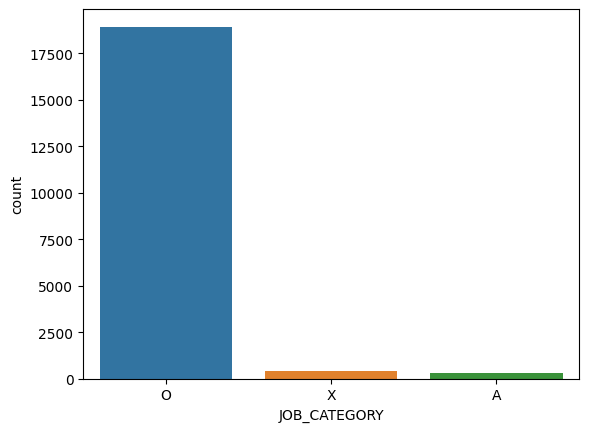

     Terms_of_emp  Ratio
CDI         16901 86.177
AUT          1176  5.996
CDD           727  3.707
TTP           323  1.647
APP           288  1.468
TOA           197  1.004
##########################################


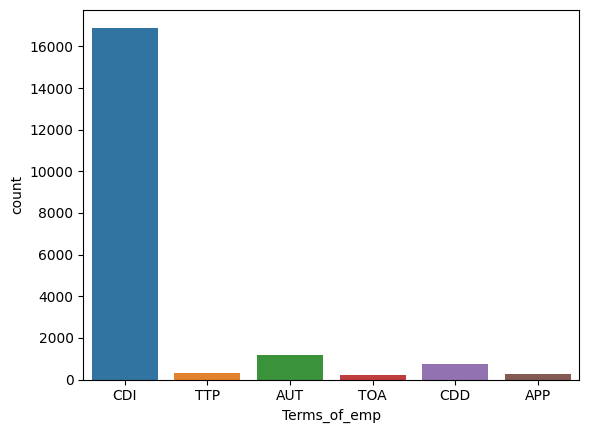

      Employer_type  Ratio
ct_9          12942 65.990
ct_8           3076 15.684
ct_6           1243  6.338
ct_7            553  2.820
ct_2            514  2.621
ct_1            489  2.493
ct_3            441  2.249
ct_5            245  1.249
ct_4            109  0.556
##########################################


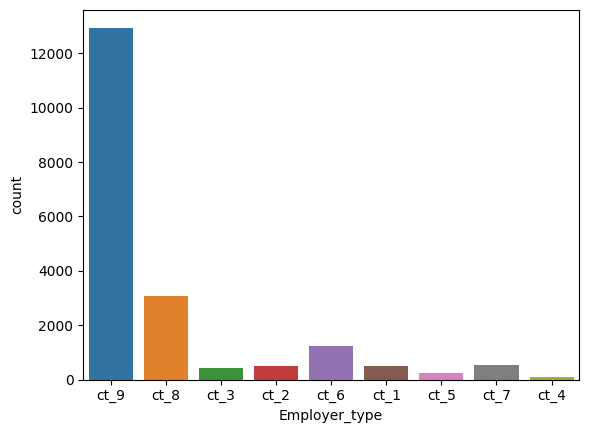

   JOB_CONDITION  Ratio
C          15349 78.263
P           3677 18.749
D            219  1.117
F            199  1.015
K             99  0.505
Y             69  0.352
##########################################


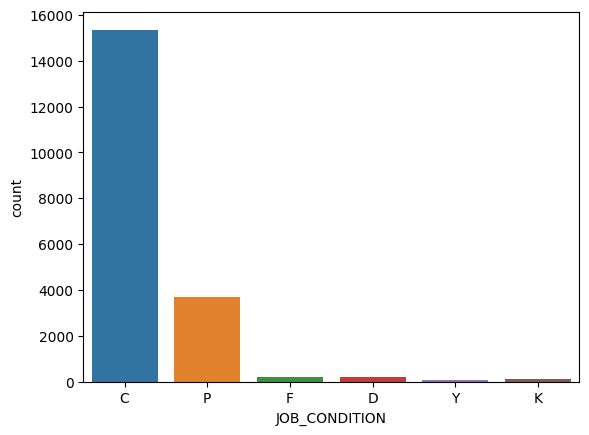

      employee_count  Ratio
tr_1            4449 22.685
tr_6            4361 22.236
tr_3            3188 16.255
tr_5            2632 13.420
tr_4            2486 12.676
tr_2            2181 11.121
tr_0             315  1.606
##########################################


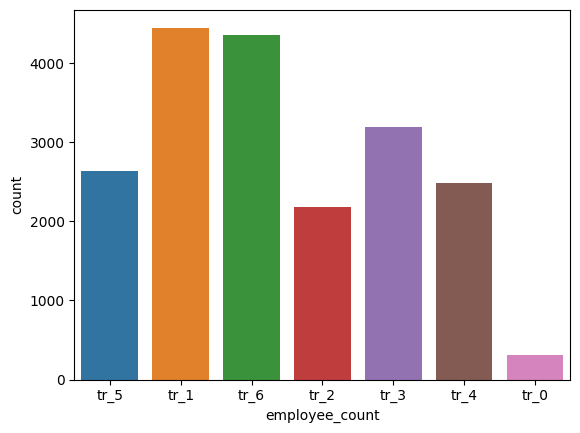

In [ ]:
for col in cat_cols:
    cat_summary(df_job,col)

count   19547.000
mean     1601.929
std       533.880
min         1.000
5%        428.000
10%       719.000
20%      1202.000
30%      1543.000
40%      1744.000
50%      1819.000
60%      1820.000
70%      1828.000
80%      1911.000
90%      2039.000
95%      2200.000
99%      3000.000
max      3000.000
Name: Working_hours, dtype: float64


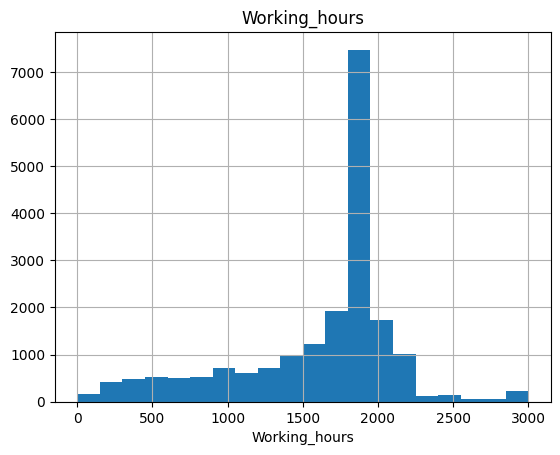

count    19612.000
mean     22812.982
std      13358.865
min         14.000
5%        5193.850
10%       8446.100
20%      13044.000
30%      15843.600
40%      17916.400
50%      20186.000
60%      22778.600
70%      25994.400
80%      30906.000
90%      40383.000
95%      50812.400
99%      64627.900
max     148739.000
Name: Emolument, dtype: float64


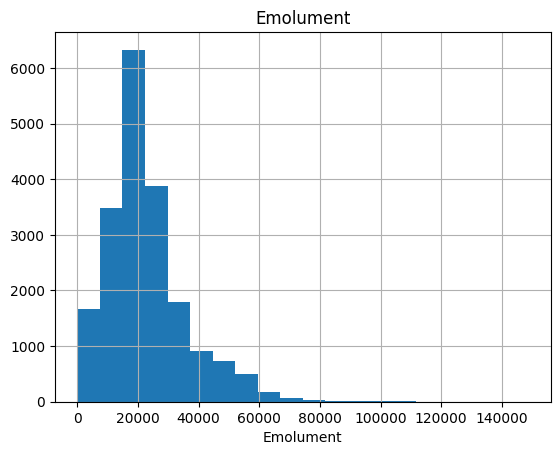

In [ ]:
for col in num_cols:
    num_summary(df_02,col,plot=True)

### Les codes Job

In [ ]:
code_JOB_Cond=pd.read_csv("/content/drive/MyDrive/projet MLfiles/code_JOB_CONDITION.csv")
code_JOB_Cond

,Code,Libellé
0,C,Temps complet
1,D,Travail à domicile
2,F,Faible temps partiel
3,K,Condition d'emploi mixte à dominante temps com...
4,P,Temps partiel
5,Y,Condition d'emploi mixte à dominante temps non...


In [ ]:
code_JOB_CATEGORY=pd.read_csv("/content/drive/MyDrive/projet MLfiles/code_JOB_CATEGORY.csv")
code_JOB_CATEGORY

,Code,Libellé
0,O,Emploi ordinaire
1,A,Apprenti
2,X,"Autres (emploi aidé, stagiaire, indemnité de c..."


In [ ]:
code_OCCUPATION=pd.read_csv("/content/drive/MyDrive/projet MLfiles/code_OCCUPATION_42.csv")
code_OCCUPATION.head()

,Code,Libellé
0,csp_1_1,Agriculteurs sur petite exploitation
1,csp_1_2,Agriculteurs sur moyenne exploitation
2,csp_1_3,Agriculteurs sur grande exploitation
3,csp_2_1,Artisans
4,csp_2_2,Commerçants et assimilés


In [ ]:
code_eco_sect=pd.read_csv('/content/drive/MyDrive/projet MLfiles/code_eco_sect.csv')
code_eco_sect.head()

,Code,Libellé
0,AZ,"Agriculture, sylviculture et pêche"
1,BZ,Industries extractives
2,CA,"Fabrication de denrées alimentaires, de boisso..."
3,CB,"Fabrication de textiles, industries de l'habil..."
4,CC,"Travail du bois, industries du papier et impri..."


In [ ]:
code_Work_description = pd.read_csv("/content/drive/MyDrive/projet MLfiles/code_Work_description.csv")
code_Work_description.head()


,Code,Libellé
0,100x,"Agriculteurs et éleveurs, salariés de leur exp..."
1,210x,Artisans salariés de leur entreprise
2,220x,"Commerçants et assimilés, salariés de leur ent..."
3,231a,Chefs de grande entreprise de 500 salariés et ...
4,232a,"Chefs de moyenne entreprise, de 50 à 499 salariés"


In [ ]:
code_Work_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Code     429 non-null    object
 1   Libellé  429 non-null    object
dtypes: object(2)
memory usage: 6.8+ KB


contient une correspondance entre les codes (N3) utilisés dans le jeux de données et deux réprentations N2 et N3.

In [ ]:
code_Work_description_map= pd.read_csv("/content/drive/MyDrive/projet MLfiles/code_Work_description_map.csv")
code_Work_description_map.head()


,N3,N2,N1
0,100x,10,1
1,210x,21,2
2,220x,22,2
3,231a,23,2
4,232a,23,2


In [ ]:
CWD_map=code_Work_description_map.copy()

Je vais rennomer la variable N3 en Work_description pour concatonner dans le dossier personne

In [ ]:
CWD_map=CWD_map.rename(columns={ 'N3': 'Work_description' })

In [ ]:
CWD_map.head()

,Work_description,N2,N1
0,100x,10,1
1,210x,21,2
2,220x,22,2
3,231a,23,2
4,232a,23,2


In [ ]:
code_Work_description_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   N3      429 non-null    object
 1   N2      429 non-null    int64 
 2   N1      429 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.2+ KB


code_Work_description_n1 contient l'association entre les codes et les groupes de professions N1

In [ ]:
code_Work_description_n1=pd.read_csv("/content/drive/MyDrive/projet MLfiles/code_Work_description_n1.csv")
code_Work_description_n1

,Code,Libellé
0,1,Agriculteurs
1,2,"Artisans, commerçants et chefs d'entreprises"
2,3,Cadres et professions intellectuelles supérieures
3,4,Professions intermédiaires
4,5,Employés
5,6,Ouvriers


code_Work_description_n2 contient l'association entre les codes et les groupes de professions N2

In [ ]:
code_Work_description_n2=pd.read_csv("/content/drive/MyDrive/projet MLfiles/code_Work_description_n2.csv")
code_Work_description_n2

,Code,Libellé
0,10,Agriculteurs (salariés de leur exploitation)
1,21,Artisans (salariés de leur entreprise)
2,22,Commerçants et assimilés (salariés de leur ent...
3,23,Chefs d'entreprise de 10 salariés ou plus (sal...
4,31,Professions libérales (exercées sous statut de...
5,33,Cadres de la fonction publique
6,34,"Professeurs, professions scientifiques"
7,35,"Professions de l'information, des arts et des ..."
8,37,Cadres administratifs et commerciaux d'entrepr...
9,38,Ingénieurs et cadres techniques d'entreprises


J'ai utilisé les codes et les groupes de professions N1 à la place de de la variables "Work_description", qui contient plus de 20 modalités différentes. 

### Ensemble personnes+job

On va maintenant créer un ensemble composé de données sur les personnes et leurs emplois actuels. 

In [38]:
#data personnes+jobs
df_pers_job = pd.merge(df_pers, df_job, on='UID')
df_pers_job.head()


,UID,ACTIVITY_TYPE,AGE_2018,sex,OCCUPATION_42,Is_student,degree,household_type,Insee,target,JOB_CATEGORY,JOB_DEP,Working_hours,eco_sect,Terms_of_emp,Employer_type,Emolument,JOB_CONDITION,employee_count,Work_description
0,1,type1-1,44,Male,csp_4_5,False,DIP|1|3,ft4-1,01004,33.179,O,71,1838.000,HZ,CDI,ct_9,20794,C,tr_5,451a
1,11,type1-1,42,Male,csp_6_7,False,DIP|1|3,ft1-1,01004,28.623,O,01,378.000,NZ,TTP,ct_9,14514,C,tr_1,674a
2,40,type1-1,59,Male,csp_5_2,False,DIP|1|1,ft4-1,01021,35.649,O,69,1958.000,QA,CDI,ct_9,21847,C,tr_6,526a
3,48,type1-1,51,Female,csp_5_4,False,DIP|1|7,ft1-2,01025,46.369,O,69,1818.000,CH,CDI,ct_9,22790,P,tr_2,542a
4,52,type1-1,51,Male,csp_6_2,False,DIP|1|3,ft1-1,01025,30.799,O,38,1843.000,CB,CDI,ct_9,27498,C,tr_6,627a


In [43]:
df_O3=df_pers_job.copy()

In [45]:
cat_cols, num_cols, cat_but_car = grab_col_names(df_O3)

Observations: 19612
Variables: 20
cat_cols: 10
num_cols: 5
cat_but_car: 5
num_but_cat: 1


In [47]:
df_O3[cat_but_car].head()

,OCCUPATION_42,Insee,JOB_DEP,eco_sect,Work_description
0,csp_4_5,01004,71,HZ,451a
1,csp_6_7,01004,01,NZ,674a
2,csp_5_2,01021,69,QA,526a
3,csp_5_4,01025,69,CH,542a
4,csp_6_2,01025,38,CB,627a


Pour la variable "Work_description" qui possède plus de 20 modalités, je le remplacerai par le code N1

In [ ]:
CWD_map.head()

,N3,N2,N1
0,100x,10,1
1,210x,21,2
2,220x,22,2
3,231a,23,2
4,232a,23,2


Ici, on va regrouper l'ensemble de données sur les personnes et l'ensemble des emplois actuels.

In [ ]:
df_04 = pd.merge(df_O3, CWD_map, on='Work_description')
df_04.head()

,UID,ACTIVITY_TYPE,AGE_2018,sex,OCCUPATION_42,Is_student,degree,household_type,Insee,target,JOB_CATEGORY,JOB_DEP,Working_hours,eco_sect,Terms_of_emp,Employer_type,Emolument,JOB_CONDITION,employee_count,Work_description,N2,N1
0,1,type1-1,44,Male,csp_4_5,False,DIP|1|3,ft4-1,01004,33.179,O,71,1838.000,HZ,CDI,ct_9,20794,C,tr_5,451a,45,4
1,836,type1-1,44,Female,csp_4_5,False,DIP|1|6,ft4-1,01393,35.983,O,69,1820.000,HZ,CDI,ct_9,20394,C,tr_6,451a,45,4
2,3087,type1-1,43,Female,csp_4_5,False,DIP|1|6,ft3-2,06027,30.909,O,06,1814.000,HZ,CDI,ct_9,21177,C,tr_6,451a,45,4
3,3630,type1-1,31,Female,csp_4_5,False,DIP|1|8,ft1-2,06088,28.492,O,06,1821.000,HZ,CDI,ct_9,19420,C,tr_2,451a,45,4
4,3775,type1-1,46,Female,csp_4_5,False,DIP|1|4,ft4-3,06088,21.763,O,06,1781.000,HZ,CDI,ct_9,26284,C,tr_6,451a,45,4


In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df_04)

Observations: 19612
Variables: 22
cat_cols: 11
num_cols: 6
cat_but_car: 5
num_but_cat: 2


In [ ]:
df_04[cat_cols].nunique()

ACTIVITY_TYPE      1
sex                2
degree            12
household_type     9
JOB_CATEGORY       3
Terms_of_emp       6
Employer_type      9
JOB_CONDITION      6
employee_count     7
Is_student         2
N1                 4
dtype: int64

In [ ]:
df_04[cat_but_car].head()

,OCCUPATION_42,Insee,JOB_DEP,eco_sect,Work_description
0,csp_4_5,01004,71,HZ,451a
1,csp_4_5,01393,69,HZ,451a
2,csp_4_5,06027,06,HZ,451a
3,csp_4_5,06088,06,HZ,451a
4,csp_4_5,06088,06,HZ,451a


In [ ]:
df_04.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19612 entries, 0 to 19611
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UID               19612 non-null  int64  
 1   ACTIVITY_TYPE     19612 non-null  object 
 2   AGE_2018          19612 non-null  int64  
 3   sex               19612 non-null  object 
 4   OCCUPATION_42     19612 non-null  object 
 5   Is_student        19612 non-null  bool   
 6   degree            19612 non-null  object 
 7   household_type    19612 non-null  object 
 8   Insee             19612 non-null  object 
 9   target            19612 non-null  float64
 10  JOB_CATEGORY      19612 non-null  object 
 11  JOB_DEP           19612 non-null  object 
 12  Working_hours     19547 non-null  float64
 13  eco_sect          19612 non-null  object 
 14  Terms_of_emp      19612 non-null  object 
 15  Employer_type     19612 non-null  object 
 16  Emolument         19612 non-null  int64 

In [ ]:
df_pers_job.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19612 entries, 0 to 19611
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UID               19612 non-null  int64  
 1   ACTIVITY_TYPE     19612 non-null  object 
 2   AGE_2018          19612 non-null  int64  
 3   sex               19612 non-null  object 
 4   OCCUPATION_42     19612 non-null  object 
 5   Is_student        19612 non-null  bool   
 6   degree            19612 non-null  object 
 7   household_type    19612 non-null  object 
 8   Insee             19612 non-null  object 
 9   target            19612 non-null  float64
 10  JOB_CATEGORY      19612 non-null  object 
 11  JOB_DEP           19612 non-null  object 
 12  Working_hours     19547 non-null  float64
 13  eco_sect          19612 non-null  object 
 14  Terms_of_emp      19612 non-null  object 
 15  Employer_type     19612 non-null  object 
 16  Emolument         19612 non-null  int64 

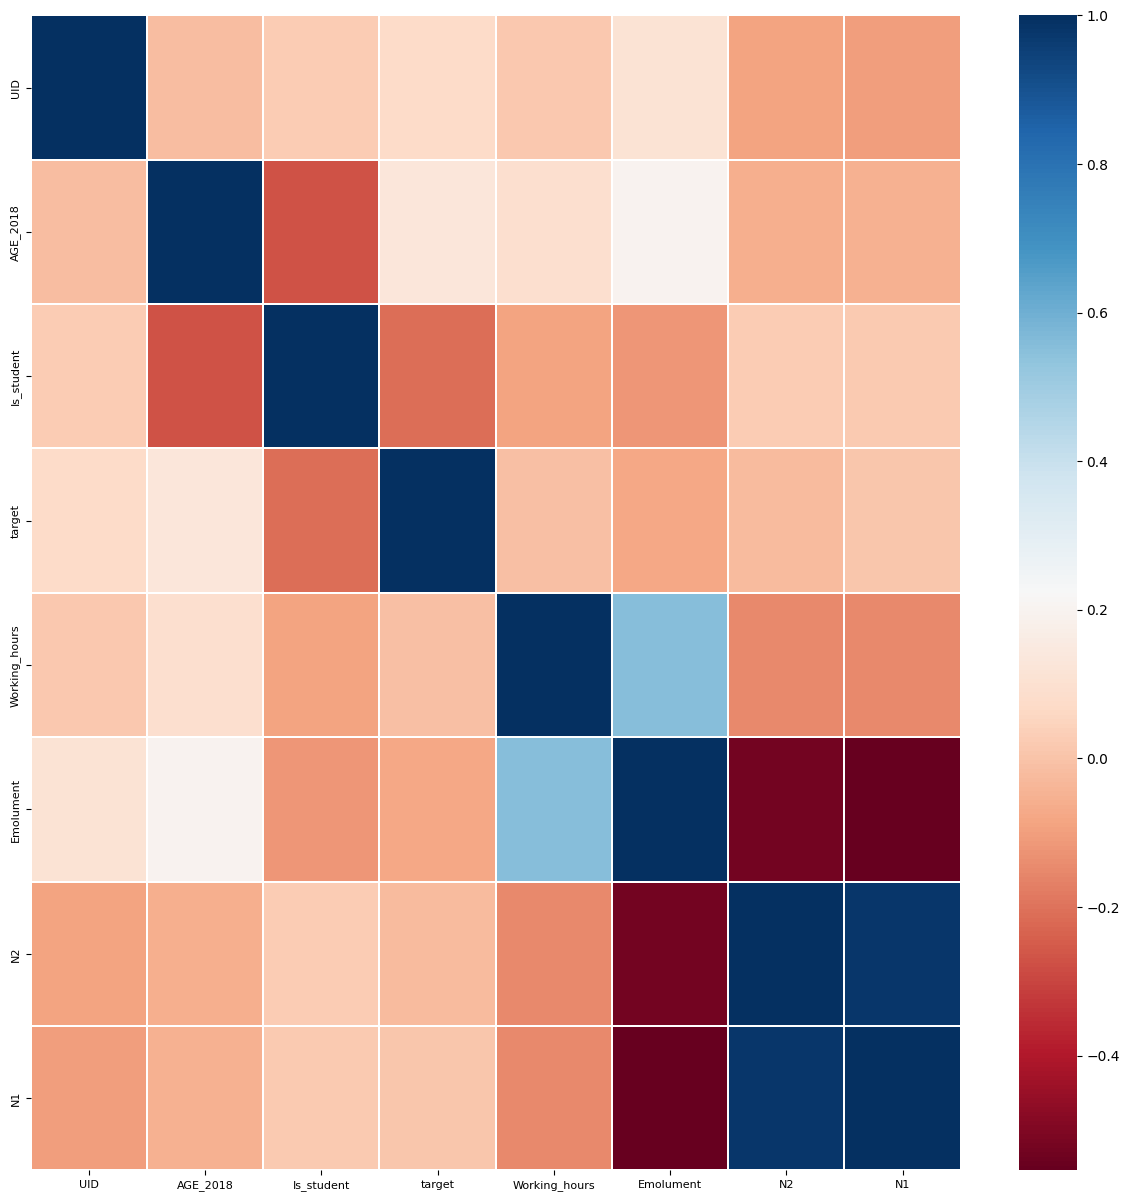

In [ ]:
correlation_matrix(df_04, df_04.columns)

In [ ]:
df_04[num_cols].corr()

,UID,AGE_2018,target,Working_hours,Emolument,N2
UID,1.000,-0.017,0.074,0.012,0.108,-0.092
AGE_2018,-0.017,1.000,0.126,0.092,0.193,-0.061
target,0.074,0.126,1.000,-0.014,-0.078,-0.024
Working_hours,0.012,0.092,-0.014,1.000,0.551,-0.151
Emolument,0.108,0.193,-0.078,0.551,1.000,-0.526
N2,-0.092,-0.061,-0.024,-0.151,-0.526,1.000


In [ ]:
missing_values_table(df_04)

               n_miss  ratio
Working_hours      65  0.330


Dans cet nouvouvel ensemble de données, j'ai 19612 lignes et 19 variables, dont 14 sont categoriellles et seule la variable "Working_hours" contient des valeurs manquantes.

In [ ]:
def quick_missing_imp(data, num_method="median", cat_length=20, target="target"):
    variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]  # Les variables avec des valeurs manquantes sont listées
    temp_target = data[target]

    print("# BEFORE")
    print(data[variables_with_na].isnull().sum(), "\n\n")  # Nombre de valeurs manquantes des variables avant implémentation

    # Remplir les valeurs manquantes avec le mode si l'objet variable et le nombre de classes sont inférieurs ou égaux à cat_length
    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)

    # Si num_method est la moyenne, les valeurs manquantes des variables de type non objet sont remplies avec la moyenne
    if num_method == "mean":
        data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
    # Si num_method est médian, les valeurs manquantes des variables de type non objet sont remplies avec la médiane
    elif num_method == "median":
        data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)

    data[target] = temp_target

    print("# AFTER \n Imputation method is 'MODE' for categorical variables!")
    print(" Imputation method is '" + num_method.upper() + "' for numeric variables! \n")
    print(data[variables_with_na].isnull().sum(), "\n\n")

    return data




In [ ]:
df_04 = quick_missing_imp(df_04, num_method="median", cat_length=17)

# BEFORE
Working_hours    65
dtype: int64 


# AFTER 
 Imputation method is 'MODE' for categorical variables!
 Imputation method is 'MEDIAN' for numeric variables! 

Working_hours    0
dtype: int64 




In [ ]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

rare_encoder(df_04,0.01)
df_04.head()

In [ ]:
drop_list = ["UID", "OCCUPATION_42", "Insee", "JOB_DEP", "Work_description","N2","eco_sect"]

# drop_list'teki değişkenlerin düşürülmesi
df_04.drop(drop_list, axis=1, inplace=True)

In [ ]:
cat_cols, cat_but_car, num_cols = grab_col_names(df_04)

Observations: 19612
Variables: 15
cat_cols: 11
num_cols: 4
cat_but_car: 0
num_but_cat: 2


In [ ]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df_04.columns if df_04[col].dtypes == "O" and len(df_04[col].unique()) == 2]

for col in binary_cols:
    label_encoder(df_04, col)

In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df_04 = one_hot_encoder(df_04, cat_cols, drop_first=True)

In [ ]:
df_04.head()

,AGE_2018,target,Working_hours,Emolument,sex_1,degree_DIP|1|1,degree_DIP|1|2,degree_DIP|1|3,degree_DIP|1|4,degree_DIP|1|5,degree_DIP|1|6,degree_DIP|1|7,degree_DIP|1|8,degree_DIP|1|9,degree_DIP|2,degree_DIP|3,household_type_ft1-2,household_type_ft2-0,household_type_ft3-1,household_type_ft3-2,household_type_ft4-1,household_type_ft4-2,household_type_ft4-3,household_type_ft4-4,JOB_CATEGORY_O,JOB_CATEGORY_X,Terms_of_emp_AUT,Terms_of_emp_CDD,Terms_of_emp_CDI,Terms_of_emp_TOA,Terms_of_emp_TTP,Employer_type_ct_2,Employer_type_ct_3,Employer_type_ct_4,Employer_type_ct_5,Employer_type_ct_6,Employer_type_ct_7,Employer_type_ct_8,Employer_type_ct_9,JOB_CONDITION_D,JOB_CONDITION_F,JOB_CONDITION_K,JOB_CONDITION_P,JOB_CONDITION_Y,employee_count_tr_1,employee_count_tr_2,employee_count_tr_3,employee_count_tr_4,employee_count_tr_5,employee_count_tr_6,Is_student_True,N1_4,N1_5,N1_6
0,44,33.179,1838.000,20794,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,44,35.983,1820.000,20394,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,43,30.909,1814.000,21177,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,31,28.492,1821.000,19420,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,46,21.763,1781.000,26284,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


### Modèle linéarire

### ML pour df_04

In [ ]:
train_df_04 = df_04[df_04['target'].notnull()]
test_df_04 = df_04[df_04['target'].isnull()]


In [ ]:
y = train_df_04['target'] # np.log1p(df['SalePrice'])
X = train_df_04.drop(["target"], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred=lin_reg.predict(X_train)


In [ ]:
r2_score(y_train, y_pred)

0.5630986124997566

In [ ]:
tree_reg=DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred=tree_reg.predict(X_train) 
r2_score(y_train, y_pred)

1.0

Il est plus probable que le modsèle sur-ajuste considérablement les données. On va utiliser la partie restante du jeu d'entrainement pour la validation du nmodèle

###Modèle 2

In [ ]:
model_2_regression = LinearRegression()
model_2_regression.fit(X_train, y_train)
y_prediction = model_2_regression.predict(X_test)
print(f"r2_score / training data: {round(model_2_regression.score(X_train, y_train)*100, 1)} %")
print(f"r2_score / test data: {round(model_2_regression.score(X_test, y_test)*100, 1)} %")


r2_score / training data: 56.3 %
r2_score / test data: 56.2 %


In [ ]:
model_2_tree_reg = DecisionTreeRegressor()
model_2_tree_reg.fit(X_train, y_train)
y_prediction = model_2_tree_reg.predict(X_test)
print(f"r2_score / training data: {round(model_2_tree_reg.score(X_train, y_train)*100, 1)} %")
print(f"r2_score / test data: {round(model_2_tree_reg.score(X_test, y_test)*100, 1)} %")


r2_score / training data: 100.0 %
r2_score / test data: 6.0 %


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
from sklearn.metrics import make_scorer, r2_score
cross_val_score(tree_reg, X_train, y_train, cv=5, scoring=make_scorer(r2_score))

array([0.18006079, 0.11731079, 0.11754498, 0.08881332, 0.08898124])

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train,
                         scoring="accuracy", cv=10)
#tree_rmse_scores = np.sqrt(-scores)
scores

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 106, in _check_targets
 

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [ ]:
df_emp_contract = pd.read_csv("/content/drive/MyDrive/projet MLfiles/learn_dataset_emp_contract.csv")
df_emp_contract.head()


,UID,emp_contract
0,1,contrat_1_6
1,7,contrat_2_2
2,11,contrat_1_2
3,12,contrat_2_2
4,30,contrat_2_1


In [ ]:
df_emp_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24360 entries, 0 to 24359
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   UID           24360 non-null  int64 
 1   emp_contract  24360 non-null  object
dtypes: int64(1), object(1)
memory usage: 380.8+ KB


In [ ]:
df_04.drop("eco_sect", axis=1, inplace=True)

M

###Emploi_contract

### BOURILLON 3

In [ ]:
models={"KNeighborsClassifier" : KNeighborsRegressor(), 
        'LinearRegression': LinearRegression(),
      #  "SGDRegressor": SGDRegressor()

        
    
}

In [ ]:
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

In [ ]:
# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    }
}

In [ ]:
#La fonction de précision
def accu(y_true, y_pred, retu= False):
  acc= accuracy_score(y_true,y_pred)
  if retu :
    return acc
  else :
    print(f'la précision du modele est : {acc}') 

In [ ]:
def train_test_eval(models, X_train,y_train,X_test, y_test):
  for name, model in modeles.items():
    print(name,':')
    medel.fit(X_train, y_train)
    accu(x_test, model.predict(X_test))
    print('-'*30)

train_test_eval(models, X_train,y_train, X_test,y_test)

NameError: ignored

### Data Sport

In [ ]:
df_sport=pd.read_csv("/content/drive/MyDrive/projet MLfiles/learn_dataset_sport.csv")
df_sport.head()

,UID,Sports
0,54,club.117
1,66,club.245
2,102,club.219
3,103,club.111
4,111,club.403


In [ ]:
df_sport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7711 entries, 0 to 7710
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UID     7711 non-null   int64 
 1   Sports  7711 non-null   object
dtypes: int64(1), object(1)
memory usage: 120.6+ KB


In [ ]:
df_sport["Sports"].value_counts()

In [ ]:
code_sport=pd.read_csv("/content/drive/MyDrive/projet MLfiles/code_Sports.csv")
code_sport.head()

,Code,Categorie,Nom fédération,Nom catégorie
0,club.101,1,Fédération française d'athlétisme,Fédération unisport olympique
1,club.102,1,Fédération française d'aviron,Fédération unisport olympique
2,club.103,1,Fédération française de badminton,Fédération unisport olympique
3,club.105,1,Fédération française de basketball,Fédération unisport olympique
4,club.106,1,Fédération française de boxe,Fédération unisport olympique


In [ ]:
code_sport=code_sport.rename(columns={ 'Code': 'Sports' , 'Categorie': 'Sports_categorie'})
code_sport.head()

,Sports,Sports_categorie,Nom fédération,Nom catégorie
0,club.101,1,Fédération française d'athlétisme,Fédération unisport olympique
1,club.102,1,Fédération française d'aviron,Fédération unisport olympique
2,club.103,1,Fédération française de badminton,Fédération unisport olympique
3,club.105,1,Fédération française de basketball,Fédération unisport olympique
4,club.106,1,Fédération française de boxe,Fédération unisport olympique


In [ ]:
#df: Sports+code
df_05 = pd.merge(code_sport, df_sport, on='Sports')
df_05.head()

,Sports,Sports_categorie,Nom fédération,Nom catégorie,UID
0,club.101,1,Fédération française d'athlétisme,Fédération unisport olympique,477
1,club.101,1,Fédération française d'athlétisme,Fédération unisport olympique,1827
2,club.101,1,Fédération française d'athlétisme,Fédération unisport olympique,2927
3,club.101,1,Fédération française d'athlétisme,Fédération unisport olympique,3494
4,club.101,1,Fédération française d'athlétisme,Fédération unisport olympique,3521


### ML df_06

Par la suite je vais créer un ensemble de donnees, rassemblant les personnes, leurs emplois actuels et leurs catégries sportives.

In [ ]:
#df:df_pers+sport

In [ ]:
df_06=pd.merge(df_pers, df_05, on='UID')
df_06.head()

,UID,ACTIVITY_TYPE,AGE_2018,sex,OCCUPATION_42,Is_student,degree,household_type,Insee,target,Sports,Categorie_Sports,Nom fédération,Nom catégorie
0,54,type1-2,21,Male,csp_8_1,False,DIP|3,ft3-2,01025,35.182,club.117,1,Fédération française de judo-jujitsu et discip...,Fédération unisport olympique
1,66,type1-1,53,Female,csp_1_1,False,DIP|1|3,ft3-2,01031,51.043,club.245,2,Fédération française de la randonnée pédestre,Fédération unisport non olympique
2,102,type2-1,67,Female,csp_7_7,False,DIP|1|5,ft4-4,01034,49.721,club.219,2,Fédération française de danse,Fédération unisport non olympique
3,103,type1-1,27,Male,csp_4_6,True,DIP|1|6,ft1-1,01034,32.977,club.111,1,Fédération française de football,Fédération unisport olympique
4,111,type1-1,54,Female,csp_2_2,False,DIP|1|2,ft4-1,01038,53.143,club.403,4,Fédération française sport pour tous,Fédération multisports affinitaire


In [ ]:
drop_list = ['OCCUPATION_42', 'Nom fédération','Nom catégorie','N2', 'Sports', 'UID', 'Work_description','eco_sect','JOB_DEP','Insee']

# drop_list'teki değişkenlerin düşürülmesi
df_06.drop(drop_list, axis=1, inplace=True)

In [ ]:
#Data : personnes+job+sport
df_06= pd.merge(df_04, df_05, on='UID')
df_06.head()

,UID,ACTIVITY_TYPE,AGE_2018,sex,OCCUPATION_42,Is_student,degree,household_type,Insee,target,JOB_CATEGORY,JOB_DEP,Working_hours,eco_sect,Terms_of_emp,Employer_type,Emolument,JOB_CONDITION,employee_count,Work_description,N2,N1,Sports,Sports_categorie,Nom fédération,Nom catégorie
0,4376,type1-1,52,Female,csp_4_5,False,DIP|1|7,ft4-1,06136,41.621,O,06,690.000,HZ,CDI,ct_9,8450,P,tr_4,451a,45,4,club.115,1,Fédération française de handball,Fédération unisport olympique
1,6828,type1-1,56,Female,csp_4_5,False,DIP|1|4,ft4-1,12032,36.132,O,75,1168.000,HZ,CDI,ct_9,15770,P,tr_6,451a,45,4,club.109,1,Fédération française d'équitation,Fédération unisport olympique
2,6989,type1-1,50,Female,csp_4_5,False,DIP|1|7,ft4-1,12145,35.647,O,12,1820.000,HZ,CDI,ct_9,24018,C,tr_6,451a,45,4,club.219,2,Fédération française de danse,Fédération unisport non olympique
3,14122,type1-1,53,Female,csp_4_5,False,DIP|1|7,ft3-2,19275,34.992,O,87,1802.000,HZ,CDI,ct_9,25575,C,tr_6,451a,45,4,club.402,4,Fédération française d'éducation physique et d...,Fédération multisports affinitaire
4,15318,type1-1,33,Female,csp_4_5,False,DIP|1|7,ft4-1,22188,43.751,O,22,1828.000,HZ,CDI,ct_9,19028,C,tr_2,451a,45,4,club.403,4,Fédération française sport pour tous,Fédération multisports affinitaire


In [ ]:
drop_list = ['OCCUPATION_42', 'Nom fédération','Nom catégorie','N2', 'Sports', 'UID', 'Work_description','eco_sect','JOB_DEP','Insee']

# drop_list'teki değişkenlerin düşürülmesi
df_06.drop(drop_list, axis=1, inplace=True)

In [ ]:
df_06.head()

,ACTIVITY_TYPE,AGE_2018,sex,Is_student,degree,household_type,target,JOB_CATEGORY,Working_hours,Terms_of_emp,Employer_type,Emolument,JOB_CONDITION,employee_count,N1,Sports_categorie
0,type1-1,52,Female,False,DIP|1|7,ft4-1,41.621,O,690.000,CDI,ct_9,8450,P,tr_4,4,1
1,type1-1,56,Female,False,DIP|1|4,ft4-1,36.132,O,1168.000,CDI,ct_9,15770,P,tr_6,4,1
2,type1-1,50,Female,False,DIP|1|7,ft4-1,35.647,O,1820.000,CDI,ct_9,24018,C,tr_6,4,2
3,type1-1,53,Female,False,DIP|1|7,ft3-2,34.992,O,1802.000,CDI,ct_9,25575,C,tr_6,4,4
4,type1-1,33,Female,False,DIP|1|7,ft4-1,43.751,O,1828.000,CDI,ct_9,19028,C,tr_2,4,4


In [ ]:
df_06 = quick_missing_imp(df_06, num_method="median", cat_length=17)

# BEFORE
Working_hours    10
dtype: int64 


# AFTER 
 Imputation method is 'MODE' for categorical variables!
 Imputation method is 'MEDIAN' for numeric variables! 

Working_hours    0
dtype: int64 




In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df_06)

Observations: 3083
Variables: 16
cat_cols: 12
num_cols: 4
cat_but_car: 0
num_but_cat: 3


In [ ]:
df_06[cat_cols].head()

,ACTIVITY_TYPE,sex,degree,household_type,JOB_CATEGORY,Terms_of_emp,Employer_type,JOB_CONDITION,employee_count,Is_student,N1,Sports_categorie
0,type1-1,Female,DIP|1|7,ft4-1,O,CDI,ct_9,P,tr_4,False,4,1
1,type1-1,Female,DIP|1|4,ft4-1,O,CDI,ct_9,P,tr_6,False,4,1
2,type1-1,Female,DIP|1|7,ft4-1,O,CDI,ct_9,C,tr_6,False,4,2
3,type1-1,Female,DIP|1|7,ft3-2,O,CDI,ct_9,C,tr_6,False,4,4
4,type1-1,Female,DIP|1|7,ft4-1,O,CDI,ct_9,C,tr_2,False,4,4


In [ ]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe



In [ ]:
binary_cols = [col for col in df_06.columns if df_06[col].dtypes == "O" and len(df_06[col].unique()) == 2]

for col in binary_cols:
    label_encoder(df_06, col)

In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe


In [ ]:
df_06 = one_hot_encoder(df_06, cat_cols, drop_first=True)

In [ ]:
df_06.head()

,AGE_2018,target,Working_hours,Emolument,sex_1,degree_DIP|1|1,degree_DIP|1|2,degree_DIP|1|3,degree_DIP|1|4,degree_DIP|1|5,degree_DIP|1|6,degree_DIP|1|7,degree_DIP|1|8,degree_DIP|1|9,degree_DIP|2,degree_DIP|3,household_type_ft1-2,household_type_ft2-0,household_type_ft3-1,household_type_ft3-2,household_type_ft4-1,household_type_ft4-2,household_type_ft4-3,household_type_ft4-4,JOB_CATEGORY_O,JOB_CATEGORY_X,Terms_of_emp_AUT,Terms_of_emp_CDD,Terms_of_emp_CDI,Terms_of_emp_TOA,Terms_of_emp_TTP,Employer_type_ct_2,Employer_type_ct_3,Employer_type_ct_4,Employer_type_ct_5,Employer_type_ct_6,Employer_type_ct_7,Employer_type_ct_8,Employer_type_ct_9,JOB_CONDITION_D,JOB_CONDITION_F,JOB_CONDITION_K,JOB_CONDITION_P,JOB_CONDITION_Y,employee_count_tr_1,employee_count_tr_2,employee_count_tr_3,employee_count_tr_4,employee_count_tr_5,employee_count_tr_6,Is_student_True,N1_4,N1_5,N1_6,Sports_categorie_2,Sports_categorie_4,Sports_categorie_5,Sports_categorie_6
0,52,41.621,690.000,8450,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,56,36.132,1168.000,15770,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,50,35.647,1820.000,24018,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
3,53,34.992,1802.000,25575,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
4,33,43.751,1828.000,19028,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
train_df_04 = df_04[df_04['target'].notnull()]
test_df_04 = df_04[df_04['target'].isnull()]

y = train_df_04['target'] # np.log1p(df['SalePrice'])
X = train_df_04.drop(["target"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred=lin_reg.predict(X_train)
r2_score(y_train, y_pred)

In [ ]:
train_df_06 = df_06[df_06['target'].notnull()]
test_df_06 = df_06[df_06['target'].isnull()]

y = train_df_06['target'] # np.log1p(df['SalePrice'])
X = train_df_06.drop(["target"], axis=1)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
model_06_regression = LinearRegression()
model_06_regression.fit(X_train, y_train)
y_prediction = model_06_regression.predict(X_train)
print("Le score R2:=",r2_score(y_train, y_prediction))
#print(f"r2_score / training data: {round(model_6_regression.score(X_train, y_train)*100, 1)} %")
#print(f"r2_score / test data: {round(model_6_regression.score(X_test, y_test)*100, 1)} %")

Le score R2:= 0.58032128328833


In [ ]:
model_6_regression = LinearRegression()
model_6_regression.fit(X_train, y_train)
y_prediction = model_6_regression.predict(X_test)
print(f"r2_score / training data: {round(model_6_regression.score(X_train, y_train)*100, 1)} %")
print(f"r2_score / test data: {round(model_6_regression.score(X_test, y_test)*100, 1)} %")


r2_score / training data: 58.0 %
r2_score / test data: 53.3 %


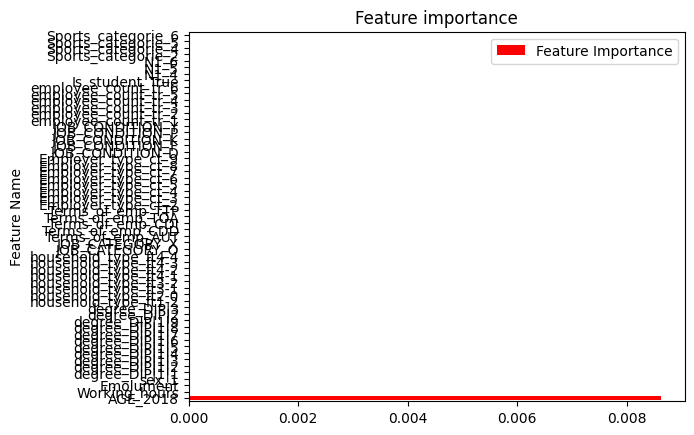

In [ ]:
def display_feat_imp_reg(reg):
  feat_imp_reg = model_06_regression.coef_[0]
  reg_feat_importance = pd.DataFrame(columns=["Feature Name", "Feature Importance"])
  reg_feat_importance["Feature Name"] = pd.Series(reg.feature_names_in_)
  reg_feat_importance["Feature Importance"] = pd.Series(feat_imp_reg)
  reg_feat_importance.plot.barh(y="Feature Importance", x="Feature Name", title="Feature importance", color="red")
 
display_feat_imp_reg(model_06_regression)


In [ ]:
def display_feat_imp_rforest(rforest):
  feat_imp = rforest.feature_importances_
  df_featimp = pd.DataFrame(feat_imp, columns = {"Feature Importance"})
  df_featimp["Feature Name"] = X_train.columns
  df_featimp = df_featimp.sort_values(by="Feature Importance", ascending=False)
  print(df_featimp)
  df_featimp.plot.barh(y="Feature Importance", x="Feature Name", title="Feature importance", color="red")
 
display_feat_imp_rforest(model_2_rforest)

In [ ]:
model_6_rforest = RandomForestRegressor()
model_6_rforest.fit(X_train, y_train)
print(f"Score / training data: {round(model_6_rforest.score(X_train, y_train)*100, 1)} %")
print(f"Score / test data: {round(model_6_rforest.score(X_test, y_test)*100, 1)} %")

Score / training data: 93.0 %
Score / test data: 46.1 %


In [ ]:
model_06_rforest = RandomForestRegressor()
model_06_rforest.fit(X_train, y_train)
y_prediction = model_06_rforest.predict(X_train)
print("Le score R2:=",r2_score(y_train, y_prediction))
#print(f"r2_score / training data: {round(model_6_regression.score(X_train, y_train)*100, 1)} %")
#print(f"r2_score / test data: {round(model_6_regression.score(X_test, y_test)*100, 1)} %")

Le score R2:= 0.9301306575304555


In [ ]:
def display_feat_imp_rforest(rforest):
  feat_imp = rforest.feature_importances_
  df_featimp = pd.DataFrame(feat_imp, columns = {"Feature Importance"})
  df_featimp["Feature Name"] = X_train.columns
  df_featimp = df_featimp.sort_values(by="Feature Importance", ascending=False)
  print(df_featimp)
  df_featimp.plot.barh(y="Feature Importance", x="Feature Name", title="Feature importance", color="red")
 
display_feat_imp_rforest(model_6_rforest)

ValueError: ignored

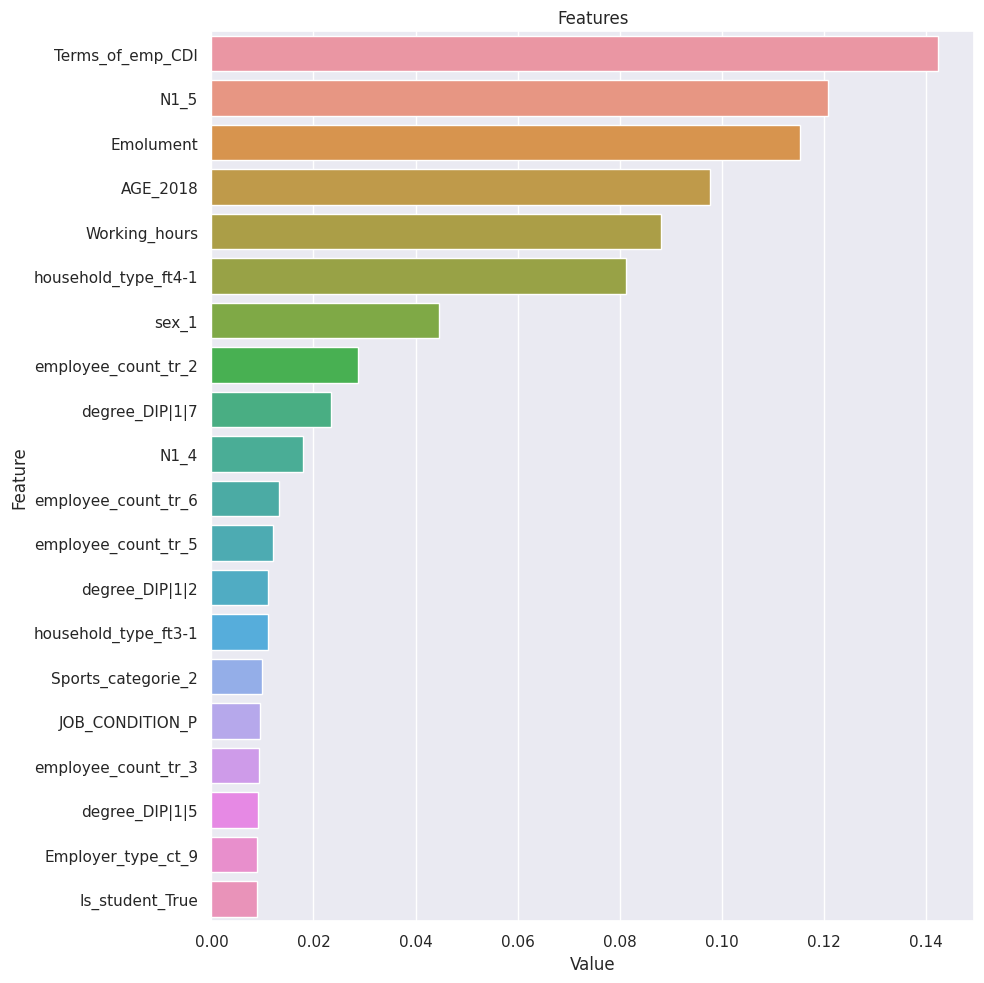

In [ ]:
def plot_importance(model, features, num=len(X), save=False):

    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")

model = model_6_rforest
model.fit(X, y)

plot_importance(model, X,num=20)

In [ ]:
model_6_tree_reg = XGBRegressor(n_estimators=50, 
                     max_depth=7, 
                     eta=0.1, 
                     subsample=0.7, 
                     colsample_bytree=0.8, 
                     objective ='reg:squarederror')
model_3_xgboost.fit(x_train, y_train)
scores = cross_val_score(model_3_xgboost, x_train, y_train,cv=10)
print("Training Data Mean cross-validation score: %.2f" % scores.mean())
scores = cross_val_score(model_3_xgboost, x_test, y_test,cv=10)
print("Test Data Mean cross-validation score: %.2f" % scores.mean())

display_feat_imp_rforest(model_2_rforest)

tree_reg=DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

In [ ]:
DecisionTreeRegressor()

In [ ]:
y_pred=lin_reg.predict(X_train)
r2_score(y_train, y_pred)

In [ ]:


model_1_regression = LinearRegression()
model_1_regression.fit(x_train, y_train)
y_test_prediction = model_1_regression.predict(x_test)
print(f"Score / training data: {round(model_1_regression.score(x_train, y_train)*100, 1)} %")
print(f"Score / test data: {round(model_1_regression.score(x_test, y_test)*100, 1)} %")


In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
df_cat_1hot=cat_encoder.fit_transform(cat_cols)
df_cat_1hot


ValueError: ignored

In [ ]:
df_06.drop('OCCUPATION_42', 'Nom fédération','Nom catégorie','N2', 'Sports', 'UID', 'Work_description','eco_sect','JOB_DEP','Insee', axis=1, inplace=True)

TypeError: ignored

In [ ]:
code_sport["Categorie"].value_counts()

2    47
1    30
4    15
6     4
5     1
Name: Categorie, dtype: int64

In [ ]:
df_sport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7711 entries, 0 to 7710
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UID     7711 non-null   int64 
 1   Sports  7711 non-null   object
dtypes: int64(1), object(1)
memory usage: 120.6+ KB


In [ ]:
code_OCCUPATION_42 = pd.read_csv("/content/drive/MyDrive/projet MLfiles/code_OCCUPATION_42.csv")  
code_OCCUPATION_42

In [ ]:
csp_1_1+csp_1_2+csp_1_3=Agriculteurs

In [ ]:
from pickle import FALSE
df.isnull().sum().sort_values(ascending= False)

In [ ]:
df.describe()

Il n'y a pas de valeurs manquantes

On peut remarquer que la variable target semble être normalement distribuées

# Nouvelle section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Données_Personnes+Jobs
df_01 = pd.merge(df_pers, df_job, on='UID', how='left')
display(df_01) 


In [ ]:
#Personnes+Jobs+sport
df_03= pd.merge(df_02, df_sport, on='UID')
display(df_03) 


,UID,ACTIVITY_TYPE,AGE_2018,sex,OCCUPATION_42,Is_student,degree,household_type,Insee,target,...,JOB_DEP,Working_hours,eco_sect,Terms_of_emp,Employer_type,Emolument,JOB_CONDITION,employee_count,Work_description,Sports
0,103,type1-1,27,Male,csp_4_6,True,DIP|1|6,ft1-1,01034,32.9767,...,01,1742.0,GZ,CDI,ct_9,23314,P,tr_3,462b,club.111
1,285,type1-1,55,Female,csp_5_5,False,DIP|1|3,ft4-1,01109,49.8176,...,01,1474.0,GZ,CDI,ct_9,10768,P,tr_2,552a,club.123
2,306,type1-1,18,Male,csp_5_6,False,DIP|1|6,ft3-2,01138,38.5393,...,01,178.0,IZ,CDI,ct_9,1855,P,tr_3,561d,club.111
3,330,type1-1,34,Female,csp_5_2,False,DIP|1|6,ft4-1,01143,44.5325,...,01,613.0,QA,CDI,ct_9,6849,C,tr_4,525d,club.402
4,349,type1-1,30,Male,csp_4_7,False,DIP|1|5,ft4-2,01149,32.0018,...,69,1820.0,CK,CDI,ct_9,26238,C,tr_5,478a,club.105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3078,99646,type1-1,33,Female,csp_3_7,False,DIP|1|8,ft4-1,95572,40.5856,...,92,1794.0,KZ,CDI,ct_9,29773,C,tr_6,373b,club.109
3079,99738,type1-1,40,Female,csp_5_6,False,DIP|1|2,ft4-1,95582,40.7197,...,95,2504.0,QB,CDI,ct_7,9805,D,tr_0,563a,club.123
3080,99740,type1-1,41,Male,csp_5_2,False,DIP|1|6,ft4-1,95582,44.4457,...,95,2053.0,QA,CDI,ct_9,21137,C,tr_2,526e,club.127
3081,99821,type1-1,24,Male,csp_5_2,False,DIP|1|5,ft2-0,95585,31.4336,...,95,1876.0,OZ,AUT,ct_2,19100,C,tr_6,524c,club.111


In [ ]:
#Personnes+Jobs+sport+df_emp_contract
df_04= pd.merge(df_03, df_emp_contract, on='UID')
display(df_04)

,UID,ACTIVITY_TYPE,AGE_2018,sex,OCCUPATION_42,Is_student,degree,household_type,Insee,target,...,Working_hours,eco_sect,Terms_of_emp,Employer_type,Emolument,JOB_CONDITION,employee_count,Work_description,Sports,emp_contract
0,103,type1-1,27,Male,csp_4_6,True,DIP|1|6,ft1-1,01034,32.9767,...,1742.0,GZ,CDI,ct_9,23314,P,tr_3,462b,club.111,contrat_1_6
1,285,type1-1,55,Female,csp_5_5,False,DIP|1|3,ft4-1,01109,49.8176,...,1474.0,GZ,CDI,ct_9,10768,P,tr_2,552a,club.123,contrat_1_6
2,306,type1-1,18,Male,csp_5_6,False,DIP|1|6,ft3-2,01138,38.5393,...,178.0,IZ,CDI,ct_9,1855,P,tr_3,561d,club.111,contrat_1_6
3,330,type1-1,34,Female,csp_5_2,False,DIP|1|6,ft4-1,01143,44.5325,...,613.0,QA,CDI,ct_9,6849,C,tr_4,525d,club.402,contrat_1_6
4,349,type1-1,30,Male,csp_4_7,False,DIP|1|5,ft4-2,01149,32.0018,...,1820.0,CK,CDI,ct_9,26238,C,tr_5,478a,club.105,contrat_1_6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3078,99646,type1-1,33,Female,csp_3_7,False,DIP|1|8,ft4-1,95572,40.5856,...,1794.0,KZ,CDI,ct_9,29773,C,tr_6,373b,club.109,contrat_1_6
3079,99738,type1-1,40,Female,csp_5_6,False,DIP|1|2,ft4-1,95582,40.7197,...,2504.0,QB,CDI,ct_7,9805,D,tr_0,563a,club.123,contrat_1_6
3080,99740,type1-1,41,Male,csp_5_2,False,DIP|1|6,ft4-1,95582,44.4457,...,2053.0,QA,CDI,ct_9,21137,C,tr_2,526e,club.127,contrat_1_6
3081,99821,type1-1,24,Male,csp_5_2,False,DIP|1|5,ft2-0,95585,31.4336,...,1876.0,OZ,AUT,ct_2,19100,C,tr_6,524c,club.111,contrat_1_5


In [ ]:
df_04.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3083 entries, 0 to 3082
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UID               3083 non-null   int64  
 1   ACTIVITY_TYPE     3083 non-null   object 
 2   AGE_2018          3083 non-null   int64  
 3   sex               3083 non-null   object 
 4   OCCUPATION_42     3083 non-null   object 
 5   Is_student        3083 non-null   bool   
 6   degree            3083 non-null   object 
 7   household_type    3083 non-null   object 
 8   Insee             3083 non-null   object 
 9   target            3083 non-null   float64
 10  JOB_CATEGORY      3083 non-null   object 
 11  JOB_DEP           3083 non-null   object 
 12  Working_hours     3073 non-null   float64
 13  eco_sect          3083 non-null   object 
 14  Terms_of_emp      3083 non-null   object 
 15  Employer_type     3083 non-null   object 
 16  Emolument         3083 non-null   int64  


**Visualisation des répartitions des variables catégorielles:**

In [ ]:
df_03.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3083 entries, 0 to 3082
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UID               3083 non-null   int64  
 1   ACTIVITY_TYPE     3083 non-null   object 
 2   AGE_2018          3083 non-null   int64  
 3   sex               3083 non-null   object 
 4   OCCUPATION_42     3083 non-null   object 
 5   Is_student        3083 non-null   bool   
 6   degree            3083 non-null   object 
 7   household_type    3083 non-null   object 
 8   Insee             3083 non-null   object 
 9   target            3083 non-null   float64
 10  JOB_CATEGORY      3083 non-null   object 
 11  JOB_DEP           3083 non-null   object 
 12  Working_hours     3073 non-null   float64
 13  eco_sect          3083 non-null   object 
 14  Terms_of_emp      3083 non-null   object 
 15  Employer_type     3083 non-null   object 
 16  Emolument         3083 non-null   int64  


In [ ]:
#description 
def frequences(df_03):
  for v in df_03.columns:
    if (df_03[v].dtypes=='object'):
      print(df_03[v].value_counts())
      print('---')
#Vérification des modalités
frequences(df_03)

type1-1    3083
Name: ACTIVITY_TYPE, dtype: int64
---
Male      2033
Female    1050
Name: sex, dtype: int64
---
csp_4_6    313
csp_5_2    258
csp_3_8    218
csp_6_3    196
csp_4_7    190
csp_5_6    187
csp_6_7    163
csp_6_2    162
csp_3_7    162
csp_5_4    158
csp_6_8    151
csp_5_5    148
csp_4_3    131
csp_5_3    105
csp_6_4    102
csp_4_2     84
csp_3_4     83
csp_4_8     81
csp_6_5     72
csp_3_3     46
csp_4_5     42
csp_3_5     17
csp_6_9     10
csp_3_1      4
Name: OCCUPATION_42, dtype: int64
---
DIP|1|3    809
DIP|1|6    474
DIP|1|8    402
DIP|1|5    351
DIP|1|4    303
DIP|1|7    297
DIP|3      144
DIP|1|2    144
DIP|2       77
DIP|1|9     32
DIP|1       30
DIP|1|1     20
Name: degree, dtype: int64
---
ft4-1    1768
ft1-1     361
ft4-2     292
ft3-2     207
ft1-2     130
ft4-3     129
ft2-0      78
ft3-1      63
ft4-4      55
Name: household_type, dtype: int64
---
31555    24
44109    16
72181    15
49007    12
75115    12
         ..
40224     1
40210     1
40202     1
40152 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5cfb66730>]],
      dtype=object)

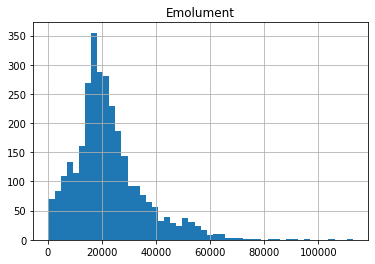

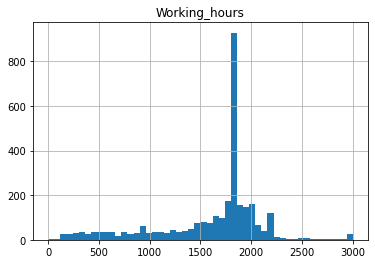

In [ ]:
#sns.countplot(x='AGE_2018',hue='target', data=df_03). 
df_03.hist("Emolument",bins=50)
df_03.hist("Working_hours",bins=50)

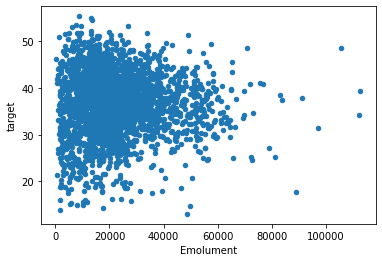

In [ ]:
df_03.plot(kind='scatter',x='Emolument',y='target',)

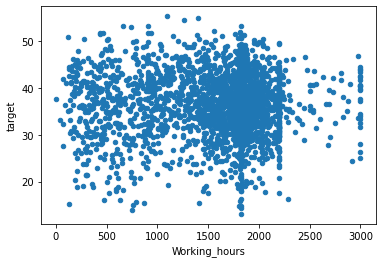

In [ ]:
df_03.plot(kind='scatter',x='Working_hours',y='target',) 

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data0.isna(),cbar=False)

In [ ]:
data = pd.merge(df, df2.loc[:,['UID', 'Working_hours', 'Emolument']], on='UID', how='outer')
display(data) 


,UID,ACTIVITY_TYPE,AGE_2018,sex,OCCUPATION_42,Is_student,degree,household_type,Insee,target,Working_hours,Emolument
0,1,type1-1,44,Male,csp_4_5,False,DIP|1|3,ft4-1,01004,33.1791,1838.0,20794.0
1,3,type2-1,52,Male,csp_7_7,False,DIP|1|1,ft4-3,01004,42.3055,NaN,NaN
2,5,type2-1,80,Male,csp_7_4,False,DIP|1|7,ft4-4,01004,45.9223,NaN,NaN
3,7,type1-1,58,Male,csp_2_2,False,DIP|1|6,ft1-1,01004,39.3028,NaN,NaN
4,11,type1-1,42,Male,csp_6_7,False,DIP|1|3,ft1-1,01004,28.6227,378.0,14514.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,99992,type1-1,37,Male,csp_5_4,False,DIP|1|8,ft4-1,95680,43.6648,1498.0,20236.0
49996,99993,type1-1,31,Male,csp_4_6,False,DIP|1|3,ft1-1,95680,32.3600,1819.0,36107.0
49997,99994,type2-1,76,Female,csp_7_5,False,DIP|1|2,ft1-2,95680,44.8873,NaN,NaN
49998,99997,type2-2,24,Female,csp_8_4,True,DIP|1|6,ft3-1,95680,48.3377,NaN,NaN


In [ ]:
data.info()

In [ ]:
plt.style.use('seaborn-white')

liste_countplot = ['sous_type','Province','Rural...urbain','classement', 'Chaine' ]
plt.figure(figsize=(15,12))

for i in np.arange(0,len(liste_countplot)):
    plt.subplot(3,2,i+1)
    dt_tmp = Hotel_liste_df[liste_countplot[i]]
    total = len(dt_tmp)*1
    ax = sns.countplot(x=Hotel_liste_df[liste_countplot[i]], data=Hotel_liste_df)
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.2, p.get_height()+5))


In [ ]:
num_cols = df_03.select_dtypes(include=['float64','int64']).columns
cat_cols = df_03.select_dtypes(include=['object']).columns
num_cols.delete(0)
#num_cols.delete(-1)

Index(['AGE_2018', 'target', 'Working_hours', 'Emolument'], dtype='object')

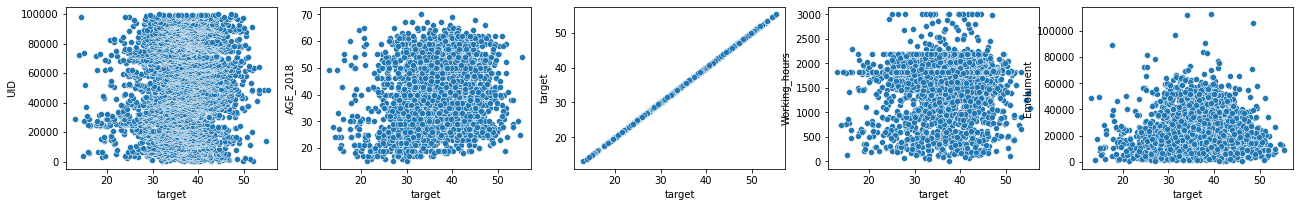

In [ ]:
plt.figure(figsize=(22,28))
for i,j in zip(num_cols, range(len(num_cols))):
    plt.subplot(8,5,j+1)
    sns.scatterplot(data=df_03, x='target', y=i)
plt.show()

In [ ]:
cat_cols = df_03.select_dtypes(include='object').columns
num_cols = df_03.select_dtypes(exclude='object').columns

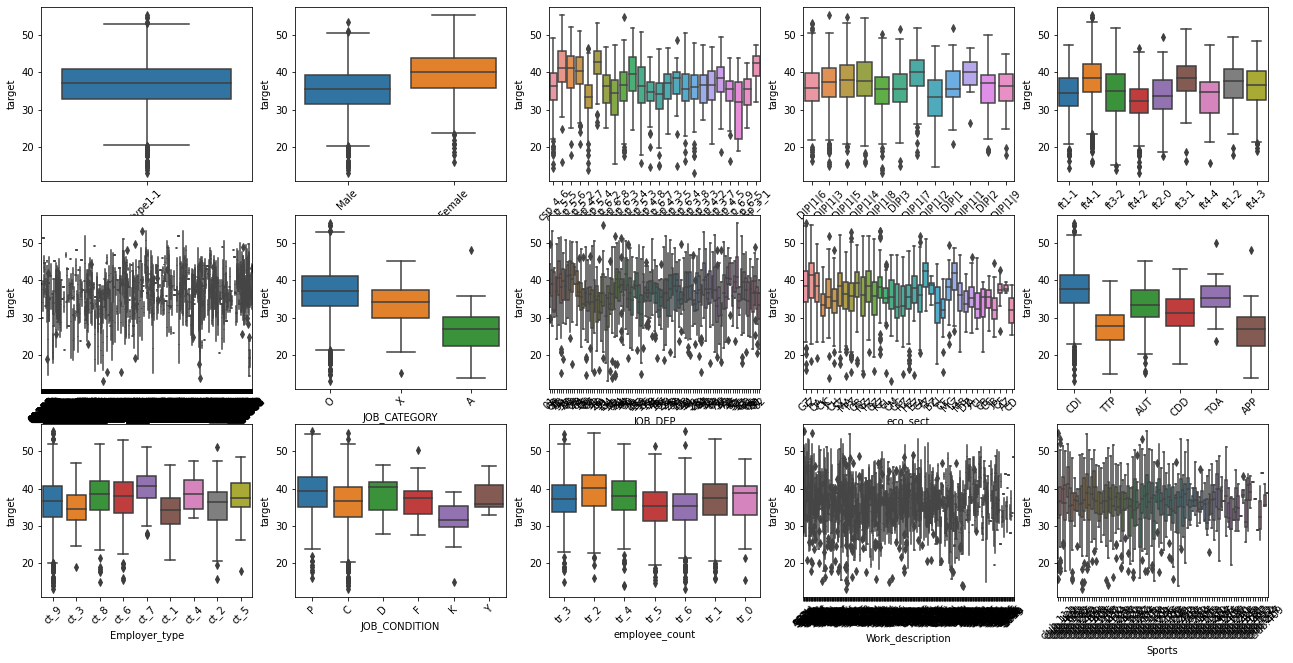

In [ ]:
plt.figure(figsize=(22,30))
for i,j in zip(cat_cols, range(len(cat_cols))):
    plt.subplot(8,5,j+1)
    plt.xticks(rotation=45)
    sns.boxplot(data=df_03, y='target', x=i)
plt.show()